# 33150 PSET 3
# Giovanni Longo (12228450)

#### ChatGPT was used for basic function debugging and plotnine assistance.

#### Begin by importing necessary libraries and setting varibales.

In [831]:
from plotnine import aes
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
import patchworklib as pw
import itertools
import plotnine as p9
import datetime
import os
import hashlib
import io
from matplotlib.image import imread

quandl.ApiConfig.api_key = '1n-fMYgMqmbySCU-zs6e'
start_date = '2016-01-01' 
end_date = '2023-06-30'

#### First, we define our standard function to grab data from the quandl api.

In [2]:
def grab_quandl_table(
    table_path,
    avoid_download=False,
    replace_existing=False,
    date_override=None,
    allow_old_file=False,
    **kwargs,
):
    root_data_dir = os.path.join(os.getcwd(), "quandl_data_table_downloads")
    data_symlink = os.path.join(root_data_dir, f"{table_path}_latest.zip")
    if avoid_download and os.path.exists(data_symlink):
        print(f"Skipping any possible download of {table_path}")
        return data_symlink
    
    table_dir = os.path.dirname(data_symlink)
    if not os.path.isdir(table_dir):
        print(f'Creating new data dir {table_dir}')
        os.makedirs(table_dir)

    if date_override is None:
        my_date = datetime.datetime.now().strftime("%Y%m%d")
    else:
        my_date = date_override
    data_file = os.path.join(root_data_dir, f"{table_path}_{my_date}.zip")

    if os.path.exists(data_file):
        file_size = os.stat(data_file).st_size
        if replace_existing or not file_size > 0:
            print(f"Removing old file {data_file} size {file_size}")
        else:
            print(
                f"Data file {data_file} size {file_size} exists already, no need to download"
            )
            return data_file

    dl = quandl.export_table(
        table_path, filename=data_file, api_key='1n-fMYgMqmbySCU-zs6e', **kwargs
    )
    file_size = os.stat(data_file).st_size
    if os.path.exists(data_file) and file_size > 0:
        print(f"Download finished: {file_size} bytes")
        if not date_override:
            if os.path.exists(data_symlink):
                print(f"Removing old symlink")
                os.unlink(data_symlink)
            print(f"Creating symlink: {data_file} -> {data_symlink}")
            os.symlink(
                data_file, data_symlink,
            )
    else:
        print(f"Data file {data_file} failed download")
        return
    return data_symlink if (date_override is None or allow_old_file) else "NoFileAvailable"


def fetch_quandl_table(table_path, avoid_download=True, **kwargs):
    return pd.read_csv(
        grab_quandl_table(table_path, avoid_download=avoid_download, **kwargs)
    )

#### We are asked to grab the FC, FR, MT, MKTV, SHRS, and HDM data from Zacks website. We will automate this process with a helper function so that we can quickly load all of the Zacks tables with 1 pass through.

In [3]:
def get_zacks_tables(extension_list):
    zacks_table_list = []
    for extension in extension_list:
        data_fetch_name = f'ZACKS/{extension}'
        data = fetch_quandl_table(data_fetch_name, avoid_download=False)
        zacks_table_list.append(data)
        
    return zacks_table_list

In [4]:
zacks_extension_list = ['FC', 'FR', 'MT', 'MKTV', 'SHRS', 'HDM']

zacks_tables = get_zacks_tables(zacks_extension_list)

fc_zacks_table = zacks_tables[0]
fr_zacks_table = zacks_tables[1]
mt_zacks_table = zacks_tables[2]
mktv_zacks_table = zacks_tables[3]
shrs_zacks_table = zacks_tables[4]
hdm_zacks_table = zacks_tables[5]

Creating new data dir C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS
Download finished: 187714472 bytes
Creating symlink: C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS/FC_20240131.zip -> C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS/FC_latest.zip
Download finished: 38676129 bytes
Creating symlink: C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS/FR_20240131.zip -> C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS/FR_latest.zip
Download finished: 1014663 bytes
Creating symlink: C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS/MT_20240131.zip -> C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\ZACKS/MT_latest.zip
Download finished: 7050915 bytes
Creating symlink: C:\Users\giova

In [5]:
fc_zacks_table

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
0,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2006-12-31,A,NaN,2006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2007-12-31,A,NaN,2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2008-12-31,A,NaN,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2009-12-31,A,NaN,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2010-12-31,A,NaN,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650007,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2017-12-31,A,NaN,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650008,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2021-12-31,Q,NaN,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650009,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2022-03-31,Q,NaN,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650010,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2022-06-30,Q,NaN,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fr_zacks_table

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,invty_turn,rcv_turn,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share
0,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2006-12-31,A,NaN,2006,...,NaN,NaN,NaN,2.4085,1.3277,0.7184,2.3844,NaN,NaN,NaN
1,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2007-12-31,A,NaN,2007,...,NaN,NaN,NaN,-0.2536,-0.1624,-0.0851,-0.2411,NaN,NaN,NaN
2,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2008-12-31,A,NaN,2008,...,NaN,NaN,NaN,-0.1566,-0.0905,-0.0507,-0.1497,NaN,NaN,NaN
3,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2009-12-31,A,NaN,2009,...,NaN,NaN,NaN,-0.2429,-0.1426,-0.0778,-0.2328,NaN,NaN,NaN
4,CPG,3262Q,NaN,CMS ENERGY -G,NaN,USD,2010-12-31,A,NaN,2010,...,NaN,NaN,NaN,-0.0653,-0.0375,-0.0209,-0.0627,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650007,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2020-06-30,Q,NaN,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650008,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2020-09-30,Q,NaN,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650009,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2020-12-31,Q,NaN,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650010,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,USD,2021-03-31,Q,NaN,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mt_zacks_table

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,ticker_type,active_ticker_flag,comp_url,sic_4_code,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
0,Z86Z,0425B,NaN,PCA INTL,NaN,NaN,NaN,N,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FFFC,1186Q,NaN,FRANKLIN FIRST,NaN,NaN,NaN,N,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WSTF,1197Q,NaN,WESTERN FINL CP,NaN,NaN,NaN,N,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HBCI,1209Q,NaN,HARMONIA,NaN,NaN,NaN,N,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TONE,1352Q,NaN,ONE BCP,NaN,NaN,NaN,N,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38898,YRK,ZYRK,NaN,YORK INTL,NaN,NaN,NaN,N,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38899,YTVU,ZYTV,NaN,YORKSHIRE-TYNE,NaN,NaN,NaN,N,NaN,NaN,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38900,ZZ,ZZ,NaN,SEALY CORP,NaN,NaN,NaN,N,NaN,NaN,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38901,BHN#,ZZLL,NaN,ZZLL INFO TEC,NaN,NaN,S,Y,NaN,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mktv_zacks_table

,ticker,m_ticker,comp_name,fye,per_type,per_end_date,active_ticker_flag,mkt_val,ep_val
0,A,A2,AGILENT TECH,10,Q,2023-09-30,Y,32717.11,34122.11
1,A,A2,AGILENT TECH,10,Q,2023-06-30,Y,35518.94,37076.94
2,A,A2,AGILENT TECH,10,Q,2023-03-31,Y,40907.39,42390.39
3,A,A2,AGILENT TECH,10,Q,2022-12-31,Y,44275.46,45955.46
4,A,A2,AGILENT TECH,10,Q,2022-09-30,Y,35983.73,37638.73
...,...,...,...,...,...,...,...,...,...
1058322,ZZ,ZZ,SEALY CORP,11,Q,2007-03-31,N,1598.88,2378.88
1058323,ZZ,ZZ,SEALY CORP,11,Q,2006-12-31,N,1342.00,2110.61
1058324,ZZ,ZZ,SEALY CORP,11,Q,2006-09-30,N,1188.43,1962.01
1058325,ZZ,ZZ,SEALY CORP,11,Q,2006-06-30,N,1201.16,1973.05


In [9]:
shrs_zacks_table

,ticker,m_ticker,comp_name,fye,per_type,per_end_date,active_ticker_flag,shares_out,avg_d_shares
0,A,A2,AGILENT TECH,10,Q,2023-07-31,Y,292.59,295.00
1,A,A2,AGILENT TECH,10,Q,2023-04-30,Y,295.38,297.00
2,A,A2,AGILENT TECH,10,Q,2023-01-31,Y,295.70,297.00
3,A,A2,AGILENT TECH,10,Q,2022-10-31,Y,296.04,298.00
4,A,A2,AGILENT TECH,10,Q,2022-07-31,Y,296.04,299.00
...,...,...,...,...,...,...,...,...,...
1058394,ZZ,ZZ,SEALY CORP,11,Q,2007-02-28,N,91.47,96.58
1058395,ZZ,ZZ,SEALY CORP,11,Q,2006-11-30,N,90.98,97.73
1058396,ZZ,ZZ,SEALY CORP,11,Q,2006-08-31,N,91.00,96.66
1058397,ZZ,ZZ,SEALY CORP,11,Q,2006-05-31,N,90.52,88.40


In [10]:
hdm_zacks_table

,action_type,m_ticker,status,per_end_month_nbr,comp_name,ticker,change_txt,ex_date,proc_date
0,5,MAYA,1,6,SYMBION HEALTH,SYHTY,SYHTE,NaN,2006-01-03
1,4,VIAB,1,12,VIACOM INC CL B,VIA.B,CBS CORP,NaN,2006-01-03
2,5,VIAB,1,12,CBS CORP,VIA.B,CBS,NaN,2006-01-03
3,6,SIE,1,12,SIERRA HEALTH,SIE,2.0000,2006-01-03,2006-01-03
4,5,VIA2,1,12,VIACOM INC-A,VIAW,VIA,NaN,2006-01-03
...,...,...,...,...,...,...,...,...,...
67111,2,XBTF,1,12,VAN-BITCN STR,XBTF,L-$39.22/SHR,2024-01-31,2024-01-31
67112,5,MVI,2,12,SINOPAC DAYLGHT,T.DAY,W.DAY,NaN,2024-01-31
67113,1,FBLG,1,12,FIBROBIOLOGICS,FBLG,NaN,NaN,2024-01-31
67114,1,MVPA,1,12,ADV-MLR VP APRC,MVPA,NaN,NaN,2024-01-31


#### With all of our raw tables loaded, we now have to begin the process of finding 200+ stocks that are 'in-universe', i.e. meaning that they agree with all the rules listed on the assignment. In order to do this, we will also need to quote media data to match to our Zacks data, so let us load in that dataframe as well.

In [11]:
try:
    quote_media_table
except Exception as e:
    quote_media_table = fetch_quandl_table('QUOTEMEDIA/PRICES', avoid_download=False)
    quote_media_table

Creating new data dir C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\QUOTEMEDIA
Download finished: 1497201910 bytes
Creating symlink: C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\QUOTEMEDIA/PRICES_20240131.zip -> C:\Users\giova\OneDrive\Desktop\FINM\Winter FINM\FINM 33150\quandl_data_table_downloads\QUOTEMEDIA/PRICES_latest.zip


,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
0,JTKWY,2022-03-11,6.1700,7.3200,5.7900,6.72,9440097.0,0.0,1.0,6.1700,7.3200,5.7900,6.72,9440097.0
1,JTKWY,2022-03-10,6.1600,6.1750,5.9350,6.07,2261623.0,0.0,1.0,6.1600,6.1750,5.9350,6.07,2261623.0
2,FG_1,2020-06-01,8.1000,8.3900,8.1000,8.39,3086317.0,0.0,1.0,8.1000,8.3900,8.1000,8.39,3086317.0
3,FLWS,2022-03-09,14.5700,14.9588,14.4100,14.45,662492.0,0.0,1.0,14.5700,14.9588,14.4100,14.45,662492.0
4,RENW_,2020-01-29,21.9768,21.9900,21.9700,21.99,319.0,0.0,1.0,21.9768,21.9900,21.9700,21.99,319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48026818,BTSG,2024-01-26,12.0000,12.1400,10.9900,11.00,24868577.0,0.0,1.0,12.0000,12.1400,10.9900,11.00,24868577.0
48026819,BTSGU,2024-01-26,46.0000,47.0000,44.4300,45.00,1850685.0,0.0,1.0,46.0000,47.0000,44.4300,45.00,1850685.0
48026820,HAO,2024-01-26,4.2500,6.2200,4.2500,5.28,3148123.0,0.0,1.0,4.2500,6.2200,4.2500,5.28,3148123.0
48026821,PBMWW,2024-01-26,0.0480,0.0524,0.0439,0.05,468209.0,0.0,1.0,0.0480,0.0524,0.0439,0.05,468209.0


#### With this final last raw data frame loaded in, we will now filter it to ensure that we have a cleaned data set for later use. We will use several helper functions to filter the data frame in useful chunks. As we create a helper function, we will explain the data processing and cleaning that was done to be more specific.

In [99]:
def basic_filtering(df, date_col_name, filter_start_date=start_date):
    '''
    A basic data frame filtering function that helps to avoid repetitive code
    in later data frame processing.
    '''
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    df = df[(df[date_col_name] >= filter_start_date) & 
            (df[date_col_name] <= end_date)]
    
    df['ticker'] = df['ticker'].astype('category')
    df = df.sort_values(by=['ticker', date_col_name])
    
    return df


def process_raw_quote_media_table(raw_qm_df, filter_start_date=start_date):
    '''
    Takes in the raw quote media data frame and begins the first step in processing
    it by sorting the table, dropping nan values, ensuring the correct time frame, and 
    filtering by the appropriate number of trading days (calculated prior). 
    '''
    file_path = os.path.join(os.getcwd(), 'processed_raw_df.pkl')
    if os.path.exists(file_path):
        return pd.read_pickle(file_path)
    
    qm_df = basic_filtering(raw_qm_df, 'date', filter_start_date).dropna()
    
    # Find the max number of available trading days to circumvent exchange differences
    trading_days = qm_df.groupby('ticker')['adj_close'].count().max()
    
    qm_df = qm_df[qm_df.groupby('ticker')['adj_close'].transform('count') == trading_days]
    qm_df.to_pickle('processed_raw_df.pkl')
    
    return qm_df

In [55]:
processed_raw_df = process_raw_quote_media_table(quote_media_table)
processed_raw_df

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
16686097,A,2016-01-04,41.0600,41.1900,40.3400,40.6900,3287335.0,0.0,1.0,38.494963,38.616842,37.819942,38.148077,3287335.0
16686096,A,2016-01-05,40.7300,40.9500,40.3400,40.5500,2587246.0,0.0,1.0,38.185579,38.391835,37.819942,38.016823,2587246.0
16686095,A,2016-01-06,40.2400,40.9900,40.0500,40.7300,2103619.0,0.0,1.0,37.726189,38.429336,37.548059,38.185579,2103619.0
16686094,A,2016-01-07,40.1400,40.1500,38.8100,39.0000,3504314.0,0.0,1.0,37.632436,37.641811,36.385522,36.563653,3504314.0
16686093,A,2016-01-08,39.2200,39.7050,38.4650,38.5900,3736768.0,0.0,1.0,36.769909,37.224611,36.062074,36.179265,3736768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12589621,ZYNE,2023-06-26,0.3318,0.3459,0.3300,0.3415,211020.0,0.0,1.0,0.331800,0.345900,0.330000,0.341500,211020.0
20456319,ZYNE,2023-06-27,0.3450,0.3450,0.3130,0.3150,909978.0,0.0,1.0,0.345000,0.345000,0.313000,0.315000,909978.0
28493197,ZYNE,2023-06-28,0.3130,0.3300,0.3100,0.3296,193667.0,0.0,1.0,0.313000,0.330000,0.310000,0.329600,193667.0
33393630,ZYNE,2023-06-29,0.3274,0.3280,0.3115,0.3200,137843.0,0.0,1.0,0.327400,0.328000,0.311500,0.320000,137843.0


#### We have now cut down our data frame from the original 48 million entries to just over 9 million, which is a whole order of magnitude less to process in the future. This is a great first step, but we still need to continue processing our data so that we have the remaining in-universe rules that were given to us. After slimming down the table based on adjusted closing prices, we now turn to the debt/market cap ratio restriction. In this case, we will need to look through the Zacks FR table and find only those stocks with a high enough Debt/MC ratio (0.1 or higher for at least one quarter). Additionally, we will include only NYSE and NASDAQ for more complete data availability in the later analysis.

In [56]:
def process_raw_fr_table(raw_fr_df):
    '''
    Takes in the raw Zacks fr data frame and returns a processed data frame that
    sorts the table, filters by exchange and debt/MC, and ensures that there
    the tickers have no missing quarters.
    '''
    file_path = os.path.join(os.getcwd(), 'processed_raw_fr_df.pkl')
    if os.path.exists(file_path):
        return pd.read_pickle(file_path)
    
    fr_df = basic_filtering(raw_fr_df, 'per_end_date')
    
    fr_df = fr_df[(fr_df['tot_debt_tot_equity'] > 0.1) & 
                  ((fr_df['exchange'] == 'NYSE') | 
                   (fr_df['exchange'] == 'NASDAQ'))]
    
    fr_df = fr_df.dropna(subset=['ticker'])
    fr_df = fr_df[fr_df['per_type'] == 'Q']

    fr_df.to_pickle('processed_raw_fr_df.pkl')
    
    return fr_df

In [57]:
processed_raw_fr_df = process_raw_fr_table(fr_zacks_table)
processed_raw_fr_df

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,invty_turn,rcv_turn,day_sale_rcv,ret_equity,ret_tang_equity,ret_asset,ret_invst,free_cash_flow_per_share,book_val_per_share,oper_cash_flow_per_share
194,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2016-01-31,Q,NaN,2016,...,0.8863,1.6661,54.0175,2.9891,11.4475,1.6571,2.1224,0.2199,12.3415,0.3343
195,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2016-04-30,Q,NaN,2016,...,0.8811,1.6927,53.1698,2.1849,8.1323,1.1911,1.5638,0.9207,12.8154,1.1128
196,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2016-07-31,Q,NaN,2016,...,0.9245,1.7695,50.8621,2.8532,8.9920,1.6033,2.0674,1.4390,13.4136,1.7043
197,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2016-10-31,Q,NaN,2016,...,0.9812,1.7607,51.1161,2.9675,9.5963,1.6166,2.0488,1.9878,13.1049,2.4103
198,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,2017-01-31,Q,NaN,2017,...,0.8947,1.6340,55.0797,3.9070,12.6697,2.1341,2.7532,0.2577,13.3540,0.3558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649945,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2022-06-30,Q,NaN,2022,...,0.5013,1.3211,68.1237,4.8486,8.5613,2.7982,4.3336,0.0342,1.7969,0.0396
649946,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2022-09-30,Q,NaN,2022,...,0.5841,1.4646,61.4523,7.4754,13.7306,4.2214,6.7653,0.2227,1.7399,0.2313
649947,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2022-12-31,Q,NaN,2022,...,0.6962,1.3919,64.6587,11.2300,20.2006,6.3984,10.3732,0.3406,1.8020,0.3513
649948,ZYXI,ZYXI,Zynex,Zynex Inc.,NASDAQ,USD,2023-03-31,Q,NaN,2023,...,0.6535,1.3153,68.4231,2.4331,4.4521,1.4128,2.2869,0.0470,1.7597,0.0517


#### Now that we have processed this data frame to address our second restriction, we want to make sure that our previous quote media data includes only the tickers in this df.

In [58]:
try:
    debt_to_mc_qm_df = pd.read_pickle(os.path.join(os.getcwd(), 'debt_to_mc_qm_df.pkl'))
except Exception as e:
    debt_to_mc_qm_df = processed_raw_df[processed_raw_df['ticker'].isin(processed_raw_fr_df['ticker'])]
    debt_to_mc_qm_df.to_pickle('debt_to_mc_qm_df.pkl')
    
debt_to_mc_qm_df

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
16572494,A,2016-01-04,41.06,41.190,40.340,40.69,3287335.0,0.0,1.0,38.494963,38.616842,37.819942,38.148077,3287335.0
16572493,A,2016-01-05,40.73,40.950,40.340,40.55,2587246.0,0.0,1.0,38.185579,38.391835,37.819942,38.016823,2587246.0
16572492,A,2016-01-06,40.24,40.990,40.050,40.73,2103619.0,0.0,1.0,37.726189,38.429336,37.548059,38.185579,2103619.0
16572491,A,2016-01-07,40.14,40.150,38.810,39.00,3504314.0,0.0,1.0,37.632436,37.641811,36.385522,36.563653,3504314.0
16572490,A,2016-01-08,39.22,39.705,38.465,38.59,3736768.0,0.0,1.0,36.769909,37.224611,36.062074,36.179265,3736768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534289,ZTS,2023-06-26,167.91,168.370,164.545,167.54,1729162.0,0.0,1.0,166.766475,167.223343,163.424392,166.398995,1729162.0
7534288,ZTS,2023-06-27,168.80,171.085,167.150,170.67,1452281.0,0.0,1.0,167.650414,169.919852,166.011651,169.507679,1452281.0
7534287,ZTS,2023-06-28,170.39,170.800,168.750,169.10,1686830.0,0.0,1.0,169.229586,169.636793,167.600755,167.948371,1686830.0
33287381,ZTS,2023-06-29,168.65,171.910,168.200,171.87,1428988.0,0.0,1.0,167.501436,170.739234,167.054500,170.699506,1428988.0


#### While this data frame was not reduced quite as much as before, we still have about 3x less rows to consider (implying that there are much less tickers to select for our final analysis). However, we are still not done yet, as we need to move onto our next step, which is to filter our tickers to exclude any companies that are automotive, financial, or insurance firms.

In [59]:
def process_raw_mt_table(raw_mt_df, exclude_industry_list, override = True):
    '''
    Takes in the raw Zacks mt data frame and returns a processed data frame that
    sorts the table, filters by exchange and debt/MC, and ensures that there
    the tickers have no missing quarters.
    '''
    if not override:
        file_path = os.path.join(os.getcwd(), 'processed_raw_mt_df.pkl')
        if os.path.exists(file_path):
            return pd.read_pickle(file_path)
    
    mt_df = raw_mt_df.dropna(subset=['zacks_x_ind_code', 'ticker'])
    
    mt_df = mt_df.loc[~mt_df['zacks_x_ind_code'].isin(exclude_industry_list)]
    
    mt_df.to_pickle('processed_raw_mt_df.pkl')
    
    return mt_df

In [60]:
industry_codes_to_avoid = [7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 48, 58, 61, 62, 63, 64, 65, 66, 67, 68, 69, 85, 86, 87, 88, 89, 151, 152, 153, 171, 204, 264, 265, 266, 276]

processed_raw_mt_df = process_raw_mt_table(mt_zacks_table, industry_codes_to_avoid)
processed_raw_mt_df

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,ticker_type,active_ticker_flag,comp_url,sic_4_code,...,per_end_month_nbr,mr_split_date,mr_split_factor,comp_cik,country_code,country_name,comp_type,optionable_flag,sp500_member_flag,asset_type
330,A2,A,Agilent Technologies,"Agilent Technologies, Inc.",NYSE,USD,S,Y,http://www.agilent.com,3826.0,...,10,NaN,NaN,0001090872,US,UNITED STATES,1.0,Y,Y,COM
333,AA2,AA,Alcoa,Alcoa,NYSE,USD,S,Y,http://www.alcoa.com,3334.0,...,12,NaN,NaN,0001675149,US,UNITED STATES,1.0,Y,N,COM
344,AACA,AACAY,AAC Technologies,AAC Technologies Holdings Inc.,NASDAQ Other OTC,USD,S,Y,http://www.aactechnologies.com,3669.0,...,12,2018-02-22,10.00,0001447647,CN,CHINA,1.0,N,N,ADR
348,ATAI,AACG,ATA,ATA Inc.,NASDAQ,USD,S,Y,http://www.atai.net.cn,8200.0,...,12,NaN,NaN,0001420529,CN,CHINA,1.0,N,N,ADR
350,AACI,AACI,Armada Acquisition Corp. I,Armada Acquisition Corp. I,NASDAQ,USD,S,Y,NaN,6770.0,...,9,NaN,NaN,NaN,US,UNITED STATES,1.0,N,N,COM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38874,BPI3,ZVOI,Zovio,Zovio Inc,NASDAQ Other OTC,USD,S,Y,http://www.zovio.com,8200.0,...,12,NaN,NaN,1305323.0,US,UNITED STATES,1.0,N,N,COM
38875,KMPH,ZVRA,"Zevra Therapeutics, Inc.","Zevra Therapeutics, Inc.",NASDAQ,USD,S,Y,https://zevra.com,2834.0,...,12,2020-12-28,0.06,1434647.0,US,UNITED STATES,1.0,Y,N,COM
38876,LSPR,ZVSA,"ZyVersa Therapeutics, Inc.","ZyVersa Therapeutics, Inc.",NASDAQ,USD,S,Y,http://www.zyversa.com,2834.0,...,12,2023-12-05,0.03,1859007.0,US,UNITED STATES,1.0,N,N,COM
38892,RXN2,ZWS,Zurn Elkay Water Solutions Cor,Zurn Elkay Water Solutions Cor,NYSE,USD,S,Y,http://www.zurn-elkay.com,3560.0,...,12,NaN,NaN,1439288.0,US,UNITED STATES,1.0,Y,N,COM


In [61]:
try:
    qm_df_filtered_by_debt_and_industry_df = pd.read_pickle(os.path.join(os.getcwd(), 'qm_df_filtered_by_debt_and_industry.pkl'))
except FileNotFoundError:
    qm_df_filtered_by_debt_and_industry_df = debt_to_mc_qm_df[debt_to_mc_qm_df['ticker'].isin(processed_raw_mt_df['ticker'])]
    qm_df_filtered_by_debt_and_industry_df.to_pickle('qm_df_filtered_by_debt_and_industry.pkl')
    
qm_df_filtered_by_debt_and_industry_df

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
16572494,A,2016-01-04,41.06,41.190,40.340,40.69,3287335.0,0.0,1.0,38.494963,38.616842,37.819942,38.148077,3287335.0
16572493,A,2016-01-05,40.73,40.950,40.340,40.55,2587246.0,0.0,1.0,38.185579,38.391835,37.819942,38.016823,2587246.0
16572492,A,2016-01-06,40.24,40.990,40.050,40.73,2103619.0,0.0,1.0,37.726189,38.429336,37.548059,38.185579,2103619.0
16572491,A,2016-01-07,40.14,40.150,38.810,39.00,3504314.0,0.0,1.0,37.632436,37.641811,36.385522,36.563653,3504314.0
16572490,A,2016-01-08,39.22,39.705,38.465,38.59,3736768.0,0.0,1.0,36.769909,37.224611,36.062074,36.179265,3736768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534289,ZTS,2023-06-26,167.91,168.370,164.545,167.54,1729162.0,0.0,1.0,166.766475,167.223343,163.424392,166.398995,1729162.0
7534288,ZTS,2023-06-27,168.80,171.085,167.150,170.67,1452281.0,0.0,1.0,167.650414,169.919852,166.011651,169.507679,1452281.0
7534287,ZTS,2023-06-28,170.39,170.800,168.750,169.10,1686830.0,0.0,1.0,169.229586,169.636793,167.600755,167.948371,1686830.0
33287381,ZTS,2023-06-29,168.65,171.910,168.200,171.87,1428988.0,0.0,1.0,167.501436,170.739234,167.054500,170.699506,1428988.0


#### We see that after filtering the industries out of the quote media data frame, we now have about 1 million fewer rows. Finally, we must address the last in-universe rule concerning the feasible calculation of the debt to market cap, return on investment, price to earnings, and a per_end_date of no more than 1 year old. However, it would be impossible to have a ticker without a per_end_date of more than 1 year old with our current quote media data frame. This is because we already filtered out tickers in the Zacks fr data frame that didn't have the maximum amount of observed quarters. Therefore, we are only concerned with ensuring that we have stocks that can adequately calculate the remaining 3 financial metrics. 

#### To start, we need to create one combined data frame with all the relevant information from the Zacks data frames. There are a few obvious columns that we will need like ticker and per_end_date, but the full list of columns to calculate the necessary ratios are:

* `ticker`
* `per_end_date`
* `per_type`
* `basic_net_eps`
* `eps_diluted_net`
* `net_lterm_debt`
* `tot_lterm_debt`
* `filing_date`
* `ret_invst`
* `tot_debt_tot_equity`
* `shares_out`
* `mkt_val`

In [79]:
def combine_and_process_zacks_tables(df_list, columns, filter_start_date=start_date):
    combined_df = pd.DataFrame()
    stored_columns = []
    for df in df_list:
        current_df = df.copy()
        current_df = current_df[current_df['ticker']
                        .isin(qm_df_filtered_by_debt_and_industry_df['ticker'].unique())]
        
        current_df = basic_filtering(current_df, 'per_end_date', filter_start_date)
        current_df = current_df[current_df['per_type'] == 'Q']
        
        current_relevant_columns = list(current_df.columns.intersection(columns))
        if stored_columns:
            relevant_columns = ([col for col in current_relevant_columns if col not in stored_columns] + 
                                ['ticker', 'per_end_date'])
        else:
            relevant_columns = list(current_df.columns.intersection(columns))
        
        current_df = current_df[relevant_columns]
        stored_columns += relevant_columns
        
        if combined_df.empty:
            combined_df = current_df
        else:
            combined_df = pd.merge(combined_df, current_df, 
                                   on=['ticker', 'per_end_date'], how='inner')

    return combined_df

In [63]:
column_list = ['ticker', 'per_end_date', 'per_type', 'basic_net_eps', 'eps_diluted_net', 'net_lterm_debt', 'tot_lterm_debt', 'filing_date', 'ret_invst', 'tot_debt_tot_equity', 'shares_out', 'mkt_val']

zacks_df_list = [fc_zacks_table, processed_raw_fr_df, shrs_zacks_table, mktv_zacks_table]

In [65]:
try:
    processed_combined_zacks_df = pd.read_pickle(os.path.join(os.getcwd(), 'processed_combined_zacks_df.pkl'))
except FileNotFoundError:
    processed_combined_zacks_df = combine_and_process_zacks_tables(zacks_df_list, column_list)
    processed_combined_zacks_df.to_pickle('processed_combined_zacks_df.pkl')
    
processed_combined_zacks_df

,ticker,per_end_date,per_type,filing_date,basic_net_eps,tot_lterm_debt,net_lterm_debt,eps_diluted_net,tot_debt_tot_equity,ret_invst,shares_out,mkt_val
0,AAPL,2016-03-31,Q,2016-04-27,0.4775,69374.0,15584.0,0.4750,0.6122,5.2624,21913.80,597096.25
1,AAPL,2016-06-30,Q,2016-07-27,0.3575,68939.0,15484.0,0.3550,0.6712,3.9881,21553.76,515134.84
2,AAPL,2016-09-30,Q,2016-10-26,0.4200,75427.0,22454.0,0.4275,0.6786,4.4257,21553.76,609163.13
3,AAPL,2016-12-31,Q,2017-02-01,0.8450,73557.0,NaN,0.8400,0.6613,8.6872,21031.28,608960.75
4,AAPL,2017-03-31,Q,2017-05-03,0.5275,84531.0,10975.0,0.5250,0.7348,5.0450,20986.16,753717.88
...,...,...,...,...,...,...,...,...,...,...,...,...
24052,ZTS,2022-06-30,Q,2022-08-04,1.1300,5221.0,NaN,1.1200,1.4352,5.3974,468.14,80468.34
24053,ZTS,2022-09-30,Q,2022-11-03,1.1300,5210.0,NaN,1.1300,1.4078,5.3485,466.07,69113.81
24054,ZTS,2022-12-31,Q,2023-02-14,0.9900,6552.0,1348.0,0.9800,1.7951,4.1990,466.07,68302.85
24055,ZTS,2023-03-31,Q,2023-05-04,1.1900,6559.0,-1350.0,1.1900,1.4611,4.9864,462.11,76913.95


#### With this new zacks data table, let's make sure that our tickers align again within the quote media data frame.

In [71]:
try:
    qm_df_with_combined_zacks = pd.read_pickle(os.path.join(os.getcwd(), 'qm_df_with_combined_zacks.pkl'))
except FileNotFoundError:
    qm_df_with_combined_zacks = (qm_df_filtered_by_debt_and_industry_df
                        [qm_df_filtered_by_debt_and_industry_df['ticker']
                        .isin(processed_combined_zacks_df['ticker'])])
    
    qm_df_with_combined_zacks.to_pickle('qm_df_with_combined_zacks.pkl')
    
qm_df_with_combined_zacks

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
42369034,AAPL,2016-01-04,102.61,105.368,102.000,105.35,67649387.0,0.0,1.0,23.351571,23.979226,23.212750,23.975129,270597548.0
42369033,AAPL,2016-01-05,105.75,105.850,102.410,102.71,55790992.0,0.0,1.0,24.066160,24.088917,23.306056,23.374329,223163968.0
42369032,AAPL,2016-01-06,100.56,102.370,99.870,100.70,68457388.0,0.0,1.0,22.885041,23.296953,22.728013,22.916901,273829552.0
42369031,AAPL,2016-01-07,98.68,100.130,96.430,96.45,81094428.0,0.0,1.0,22.457198,22.787183,21.945152,21.949703,324377712.0
42369030,AAPL,2016-01-08,98.55,99.110,96.760,96.96,70798016.0,0.0,1.0,22.427613,22.555055,22.020252,22.065767,283192064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534289,ZTS,2023-06-26,167.91,168.370,164.545,167.54,1729162.0,0.0,1.0,166.766475,167.223343,163.424392,166.398995,1729162.0
7534288,ZTS,2023-06-27,168.80,171.085,167.150,170.67,1452281.0,0.0,1.0,167.650414,169.919852,166.011651,169.507679,1452281.0
7534287,ZTS,2023-06-28,170.39,170.800,168.750,169.10,1686830.0,0.0,1.0,169.229586,169.636793,167.600755,167.948371,1686830.0
33287381,ZTS,2023-06-29,168.65,171.910,168.200,171.87,1428988.0,0.0,1.0,167.501436,170.739234,167.054500,170.699506,1428988.0


#### Note that our data frame starts for the month January 2016. However, in order for us to get a ratio FOR 2016, we are going to need the data from the previous year 2015. Since we already have a filtered data frame with stocks that pass our other filters, we could not possibly add more stocks to this list with the extra restriction that the stock needs 2015 filing data. Therefore, we will simply adjust our current Zacks data frame accordingly and filter our quote media data frame again.

In [126]:
def zacks_2015_dataframe(df_list):
    df_list_2015 = []
    for i in range(len(df_list)):
        df_2015 = df_list[i].copy()
        df_2015 = df_2015[(df_2015['per_end_date'] < '2016-01-01') & 
                          (df_2015['per_end_date'] >= '2015-01-01')]
        df_list_2015.append(df_2015)
        
    return combine_and_process_zacks_tables(df_list_2015, column_list, '2015-01-01')


def zacks_with_2015_filings(df):
    df['filing_date'] = pd.to_datetime(df['filing_date'])
    
    tickers_2015 = df[df['filing_date'].dt.year == 2015]['ticker'].unique()

    return df[df['ticker'].isin(tickers_2015)].sort_values(by=['ticker', 'per_end_date'])

In [127]:
zacks_2015_df_list = [fc_zacks_table, fr_zacks_table, shrs_zacks_table, mktv_zacks_table]

zacks_2015_data = zacks_2015_dataframe(zacks_2015_df_list)

combined_2015_zacks_df = zacks_with_2015_filings(pd.concat([zacks_2015_data, processed_combined_zacks_df], 
                            ignore_index=True).sort_values(by=['ticker', 'per_end_date']))

In [128]:
combined_2015_zacks_df

,ticker,per_end_date,per_type,filing_date,basic_net_eps,tot_lterm_debt,net_lterm_debt,eps_diluted_net,tot_debt_tot_equity,ret_invst,shares_out,mkt_val
0,AAPL,2015-03-31,Q,2015-04-28,0.5850,40072.0,11332.0,0.5825,0.3401,8.0253,23464.64,729926.31
1,AAPL,2015-06-30,Q,2015-07-22,0.4650,47419.0,21312.0,0.4625,0.4330,6.1683,22810.88,715263.69
2,AAPL,2015-09-30,Q,2015-10-28,0.4925,53329.0,27114.0,0.4950,0.5390,6.4418,22810.88,629010.06
3,AAPL,2015-12-31,Q,2016-01-27,0.8250,53204.0,NaN,0.8200,0.4909,10.1179,22177.96,583613.00
3201,AAPL,2016-03-31,Q,2016-04-27,0.4775,69374.0,15584.0,0.4750,0.6122,5.2624,21913.80,597096.25
...,...,...,...,...,...,...,...,...,...,...,...,...
27253,ZTS,2022-06-30,Q,2022-08-04,1.1300,5221.0,NaN,1.1200,1.4352,5.3974,468.14,80468.34
27254,ZTS,2022-09-30,Q,2022-11-03,1.1300,5210.0,NaN,1.1300,1.4078,5.3485,466.07,69113.81
27255,ZTS,2022-12-31,Q,2023-02-14,0.9900,6552.0,1348.0,0.9800,1.7951,4.1990,466.07,68302.85
27256,ZTS,2023-03-31,Q,2023-05-04,1.1900,6559.0,-1350.0,1.1900,1.4611,4.9864,462.11,76913.95


In [352]:
try:
    processed_combined_qm_df_2015 = pd.read_pickle('processed_combined_qm_df_2015.pkl')
except Exception as e:
    processed_raw_qm_df_2015 = quote_media_table[(quote_media_table['date'] >= '2015-01-01') & 
                                                 (quote_media_table['date'] <= end_date)]
    
    processed_raw_qm_df_2015 = (processed_raw_qm_df_2015
                            [processed_raw_qm_df_2015['ticker']
                            .isin(combined_2015_zacks_df['ticker'])])
    
    processed_combined_qm_df_2015 = processed_raw_qm_df_2015.sort_values(by=['ticker', 'date'])
    
    processed_combined_qm_df_2015.to_pickle('processed_combined_qm_df_2015.pkl')

processed_combined_qm_df_2015

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
42393239,AAPL,2015-01-02,111.39,111.440,107.350,109.33,53204626.0,0.0,1.0,24.926091,24.937280,24.022048,24.465118,212818504.0
42393238,AAPL,2015-01-05,108.29,108.650,105.410,106.25,64285491.0,0.0,1.0,24.232394,24.312953,23.587928,23.775897,257141964.0
42393237,AAPL,2015-01-06,106.54,107.430,104.630,106.26,65797116.0,0.0,1.0,23.840791,24.039949,23.413385,23.778135,263188464.0
42393236,AAPL,2015-01-07,107.20,108.200,106.695,107.75,40105934.0,0.0,1.0,23.988482,24.212255,23.875476,24.111557,160423736.0
42393235,AAPL,2015-01-08,109.23,112.150,108.700,111.89,59364547.0,0.0,1.0,24.442741,25.096159,24.324141,25.037978,237458188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7512155,ZTS,2023-06-26,167.91,168.370,164.545,167.54,1729162.0,0.0,1.0,166.766475,167.223343,163.424392,166.398995,1729162.0
7512154,ZTS,2023-06-27,168.80,171.085,167.150,170.67,1452281.0,0.0,1.0,167.650414,169.919852,166.011651,169.507679,1452281.0
7512153,ZTS,2023-06-28,170.39,170.800,168.750,169.10,1686830.0,0.0,1.0,169.229586,169.636793,167.600755,167.948371,1686830.0
33319119,ZTS,2023-06-29,168.65,171.910,168.200,171.87,1428988.0,0.0,1.0,167.501436,170.739234,167.054500,170.699506,1428988.0


#### With all of our data frames in year agreement, we now must combine them into one usable dataframe. Note that we can drop any filing dates that come before the most recent 2015 filing date, as they will be unnecessary. We notice also that the Zacks data is in a quarterly format while the quote media data is a daily data set. We will implement a function to fill in the Zacks data to the quote media data by repeating values until there is a change in filing date.

In [270]:
def filter_reports_with_latest_2015(df):
    post_2015_df = df[df['filing_date'].dt.year >= 2016]
    filings_2015_df = df[df['filing_date'].dt.year == 2015]

    latest_2015 = filings_2015_df.drop_duplicates('ticker', keep='last')
    final_df = pd.concat([post_2015_df, latest_2015]).sort_values(by=['ticker', 'filing_date'])

    return final_df


def add_quarterly_data_to_daily(df1, df2):
    daily_df = df1.copy()
    quarterly_df = df2.copy()

    daily_df['ticker'] = daily_df['ticker'].astype(str)
    daily_df['date'] = pd.to_datetime(daily_df['date'])
    quarterly_df['filing_date'] = pd.to_datetime(quarterly_df['filing_date'])

    # Get the next filing date for each row in the quarterly data
    quarterly_df['next_filing_date'] = quarterly_df.groupby('ticker')['filing_date'].shift(-1)

    # Merge the quarterly data with the daily data
    merged_df = daily_df.merge(quarterly_df, on='ticker', how='left')
    merged_df = merged_df[(merged_df['date'] >= merged_df['filing_date']) & 
                          ((merged_df['date'] < merged_df['next_filing_date']) | 
                           (merged_df['next_filing_date'].isna()))]

    # Forward fill the data within each ticker group
    columns_to_ffill = ([col for col in quarterly_df.columns if col not in 
                        ['ticker', 'filing_date', 'next_filing_date']])
    merged_df[columns_to_ffill] = merged_df.groupby('ticker')[columns_to_ffill].ffill()

    # Sorting by 'ticker' and 'date'
    merged_df.sort_values(by=['ticker', 'date'], inplace=True)
    merged_df = merged_df.drop(columns=['next_filing_date'])

    return merged_df

In [222]:
combined_2015_zacks_df = filter_reports_with_latest_2015(combined_2015_zacks_df)

reduced_qm_df = (qm_df_with_combined_zacks[qm_df_with_combined_zacks['ticker']
                    .isin(processed_combined_qm_df_2015['ticker'])])

reduced_qm_df = reduced_qm_df[['ticker', 'date', 'adj_close']]

reduced_qm_df

,ticker,date,adj_close
42369034,AAPL,2016-01-04,23.975129
42369033,AAPL,2016-01-05,23.374329
42369032,AAPL,2016-01-06,22.916901
42369031,AAPL,2016-01-07,21.949703
42369030,AAPL,2016-01-08,22.065767
...,...,...,...
7534289,ZTS,2023-06-26,166.398995
7534288,ZTS,2023-06-27,169.507679
7534287,ZTS,2023-06-28,167.948371
33287381,ZTS,2023-06-29,170.699506


In [316]:
try:
    consolidated_daily_df_with_zacks = pd.read_csv('consolidated_daily_df_with_zacks.pkl')
except FileNotFoundError:
    consolidated_daily_df_with_zacks = add_quarterly_data_to_daily(reduced_qm_df, combined_2015_zacks_df)
    consolidated_daily_df_with_zacks.reset_index(drop=True, inplace=True)
    consolidated_daily_df_with_zacks = (consolidated_daily_df_with_zacks
                                        .drop(columns=['per_type', 'basic_net_eps']))
    consolidated_daily_df_with_zacks.sort_values('per_end_date', inplace=True)
    consolidated_daily_df_with_zacks.to_pickle('consolidated_daily_df_with_zacks.pkl')

consolidated_daily_df_with_zacks[consolidated_daily_df_with_zacks['ticker'] == 'ABG']

,ticker,date,adj_close,per_end_date,filing_date,tot_lterm_debt,net_lterm_debt,eps_diluted_net,tot_debt_tot_equity,ret_invst,shares_out,mkt_val
1917,ABG,2016-02-18,51.87,2015-09-30,2015-10-22,747.9,NaN,1.96,5.0862,4.8193,25.38,2059.75
1916,ABG,2016-02-17,52.65,2015-09-30,2015-10-22,747.9,NaN,1.96,5.0862,4.8193,25.38,2059.75
1915,ABG,2016-02-16,50.81,2015-09-30,2015-10-22,747.9,NaN,1.96,5.0862,4.8193,25.38,2059.75
1914,ABG,2016-02-12,49.05,2015-09-30,2015-10-22,747.9,NaN,1.96,5.0862,4.8193,25.38,2059.75
1913,ABG,2016-02-11,49.10,2015-09-30,2015-10-22,747.9,NaN,1.96,5.0862,4.8193,25.38,2059.75
...,...,...,...,...,...,...,...,...,...,...,...,...
3761,ABG,2023-06-15,228.76,2023-03-31,2023-04-28,3194.8,7.3,8.37,1.0900,2.9052,21.53,4522.16
3762,ABG,2023-06-16,221.79,2023-03-31,2023-04-28,3194.8,7.3,8.37,1.0900,2.9052,21.53,4522.16
3763,ABG,2023-06-20,224.47,2023-03-31,2023-04-28,3194.8,7.3,8.37,1.0900,2.9052,21.53,4522.16
3764,ABG,2023-06-21,226.48,2023-03-31,2023-04-28,3194.8,7.3,8.37,1.0900,2.9052,21.53,4522.16


#### With our consolidated data frame, we will now calculate the fundamentals and append it to this data frame.

In [476]:
def calculate_fundamental_financials(filtered_df):
    '''
    Takes in a filtered data frame and returns a final data frame with all the
    relevant fundamentals added as new columns.
    '''
    strategy_ready_df = filtered_df.copy()
    
    # Add debt to market cap
    strategy_ready_df['dmc'] = (
            (strategy_ready_df['tot_debt_tot_equity'] * 
             strategy_ready_df['prev_period_close']) / 
            strategy_ready_df['adj_close']
    )
    
    # Add return on investment
    strategy_ready_df['debt'] = (strategy_ready_df['net_lterm_debt']
                                        .fillna(strategy_ready_df['tot_lterm_debt']))
    
    # Calculating return on investment
    strategy_ready_df['curr_val'] = ((strategy_ready_df['mkt_val'] * strategy_ready_df['adj_close']) 
                                     / strategy_ready_df['prev_period_close'])
    strategy_ready_df['roi'] = (strategy_ready_df['ret_invst'] * 
                                (strategy_ready_df['debt'] + strategy_ready_df['mkt_val']) 
                                / (strategy_ready_df['debt'] + strategy_ready_df['curr_val']))
    strategy_ready_df.drop(columns=['debt'], inplace=True)
    
    # Add price to earnings
    nan_eps_mask = (strategy_ready_df.groupby('ticker')['eps_diluted_net']
                                      .transform(lambda x: x.isna().any()))
    strategy_ready_df = strategy_ready_df[~nan_eps_mask]
    
    strategy_ready_df['pe'] = (strategy_ready_df['adj_close'] / 
                               strategy_ready_df['eps_diluted_net'])

    return strategy_ready_df

In [477]:
reduced_qm_df_2015 = processed_combined_qm_df_2015[['ticker', 'date', 'adj_close']]
reduced_qm_df_2015.sort_values('date', inplace=True)
pre_ratio_qm_df = (pd.merge_asof(consolidated_daily_df_with_zacks, reduced_qm_df_2015, 
                                 left_on='per_end_date', right_on='date', by='ticker', direction='backward')
                                 .drop(columns='date_y').rename(columns=
                                {'date_x': 'date', 'adj_close_x':'adj_close', 'adj_close_y':'prev_period_close'}))
                   
pre_ratio_qm_df.sort_values(by=['ticker', 'date'], inplace=True)

pre_ratio_qm_df

,ticker,date,adj_close,per_end_date,filing_date,tot_lterm_debt,net_lterm_debt,eps_diluted_net,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,prev_period_close
0,AAPL,2016-01-04,23.975129,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836
24221,AAPL,2016-01-05,23.374329,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836
24222,AAPL,2016-01-06,22.916901,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836
24223,AAPL,2016-01-07,21.949703,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836
24246,AAPL,2016-01-08,22.065767,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311617,ZTS,2023-06-26,166.398995,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802
1311616,ZTS,2023-06-27,169.507679,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802
1311615,ZTS,2023-06-28,167.948371,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802
1334747,ZTS,2023-06-29,170.699506,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802


In [478]:
strategy_ready_qm_df = calculate_fundamental_financials(pre_ratio_qm_df)
strategy_ready_qm_df

,ticker,date,adj_close,per_end_date,filing_date,tot_lterm_debt,net_lterm_debt,eps_diluted_net,tot_debt_tot_equity,ret_invst,shares_out,mkt_val,prev_period_close,dmc,curr_val,roi,pe
0,AAPL,2016-01-04,23.975129,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836,0.560126,605285.844802,6.683461,48.434605
24221,AAPL,2016-01-05,23.374329,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836,0.574523,590117.789460,6.847703,47.220866
24222,AAPL,2016-01-06,22.916901,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836,0.585991,578569.383688,6.978266,46.296770
24223,AAPL,2016-01-07,21.949703,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836,0.611812,554151.112778,7.271415,44.342835
24246,AAPL,2016-01-08,22.065767,2015-09-30,2015-10-28,53329.0,27114.0,0.495,0.5390,6.4418,22810.88,629010.06,24.914836,0.608594,557081.305287,7.234943,44.577307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311617,ZTS,2023-06-26,166.398995,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802,1.448393,77588.749035,4.942265,139.831088
1311616,ZTS,2023-06-27,169.507679,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802,1.421830,79038.270251,4.850051,142.443427
1311615,ZTS,2023-06-28,167.948371,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802,1.435031,78311.194114,4.895871,141.133085
1334747,ZTS,2023-06-29,170.699506,2023-03-31,2023-05-04,6559.0,-1350.0,1.190,1.4611,4.9864,462.11,76913.95,164.951802,1.411903,79593.997234,4.815604,143.444963


#### Now that we have a strategy ready data frame, we will do one last final filter to ensure that all of our stocks are completely ready to be used to a quantile strategy. So, we will remove stocks that have had a split and cut any tickers which have an NaN value for any of these fundamentals calculated above.

In [482]:
try:
    filtered_strategy_df = pd.read_pickle('filtered_strategy_df.pkl')
except FileNotFoundError:
    columns_to_check = ['dmc', 'curr_val', 'roi', 'pe']
    
    qm_df_without_splits = (qm_df_with_combined_zacks
                                 .groupby('ticker')
                                 .filter(lambda x: (x['split'] == 1).all()))
    
    filtered_strategy_df = (strategy_ready_qm_df
                                [strategy_ready_qm_df['ticker']
                                .isin(qm_df_without_splits['ticker'])])
    filtered_strategy_df.reset_index(drop=True, inplace=True)
    filtered_strategy_df = (filtered_strategy_df.groupby('ticker')
                            .filter(lambda x: not x[columns_to_check].isna().any().any()))
    
    filtered_strategy_df.drop(columns=['per_end_date', 'filing_date', 'tot_lterm_debt', 'net_lterm_debt', 
                                       'eps_diluted_net', 'tot_debt_tot_equity', 'ret_invst', 'shares_out', 
                                       'mkt_val', 'prev_period_close', 'curr_val'], inplace=True, axis=1)
    
    filtered_strategy_df.to_pickle('filtered_strategy_df.pkl')

filtered_strategy_df

,ticker,date,adj_close,dmc,roi,pe
0,ABG,2016-01-04,66.520000,6.204828,5.553850,33.938776
1,ABG,2016-01-05,65.130000,6.337251,5.635459,33.229592
2,ABG,2016-01-06,57.340000,7.198206,6.141189,29.255102
3,ABG,2016-01-07,55.620000,7.420804,6.265332,28.377551
4,ABG,2016-01-08,53.340000,7.738004,6.437844,27.214286
...,...,...,...,...,...,...
1210807,ZTS,2023-06-26,166.398995,1.448393,4.942265,139.831088
1210808,ZTS,2023-06-27,169.507679,1.421830,4.850051,142.443427
1210809,ZTS,2023-06-28,167.948371,1.435031,4.895871,141.133085
1210810,ZTS,2023-06-29,170.699506,1.411903,4.815604,143.444963


#### With the data properly created and filtered, we move on to the actual trading strategy class creation. Note that we are going to want to ensure that the strategy works for ranking the debt to market cap, the return on investment, and the price to equity ratio. Additionally, we will have to implement a non-trivial combination of the three fundamentals, which we will address first and add to the above data frame.

In [779]:
def non_trivial_combination(df):
    '''
    Creates a new non-trivial combination of the three calculated fundamentals to
    implement into our trading strategy. The combination is based on multiplying the
    current sum of fundamentals by the sum of percent change they experience,
    calculated separately for each ticker group.
    '''

    # Define a function that calculates the pct_change and combination for a single group
    def calculate_pct_change_and_combination(group):
        group['dmc_pct_change'] = group['dmc'].pct_change()
        group['roi_pct_change'] = group['roi'].pct_change()
        group['pe_pct_change'] = group['pe'].pct_change()
        
        group['pct_values'] = (group['dmc_pct_change'] + group['roi_pct_change'] + group['pe_pct_change']).fillna(0)
        
        group['combination_value'] = group['pct_values'].diff().fillna(np.random.uniform(-0.1, 0.1))
        
        return group

    combo_df = df.groupby('ticker').apply(calculate_pct_change_and_combination)

    combo_df.drop(columns=['dmc_pct_change', 'roi_pct_change', 'pe_pct_change', 'pct_values'], inplace=True)
    
    combo_df.reset_index(drop=True, inplace=True)

    return combo_df

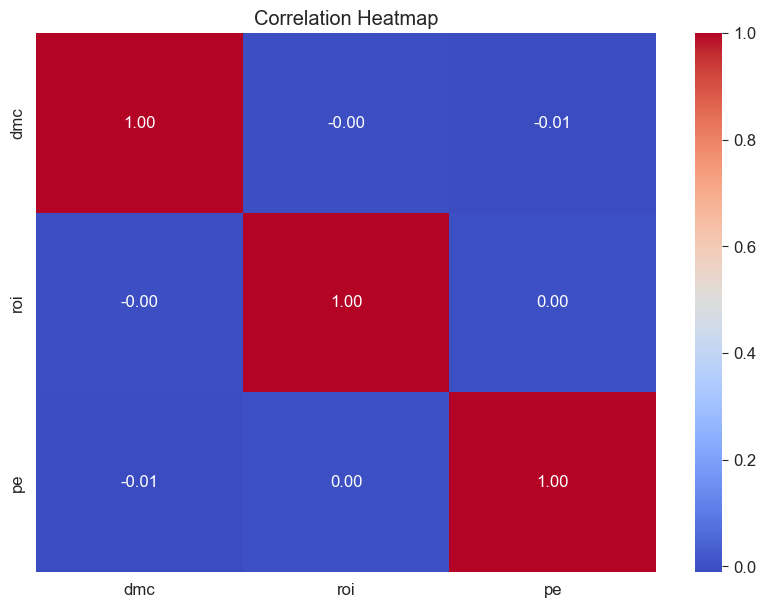

In [780]:
correlation_columns = ['dmc', 'roi', 'pe']

# Calculate the correlation matrix
correlation_matrix = filtered_strategy_df[correlation_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [781]:
filtered_strategy_df_with_combination = non_trivial_combination(filtered_strategy_df)
filtered_strategy_df_with_combination

,ticker,date,adj_close,dmc,roi,pe,combination_value
0,ABG,2016-01-04,66.520000,6.204828,5.553850,33.938776,-0.065609
1,ABG,2016-01-05,65.130000,6.337251,5.635459,33.229592,0.015140
2,ABG,2016-01-06,57.340000,7.198206,6.141189,29.255102,0.090850
3,ABG,2016-01-07,55.620000,7.420804,6.265332,28.377551,-0.084847
4,ABG,2016-01-08,53.340000,7.738004,6.437844,27.214286,0.008144
...,...,...,...,...,...,...,...
1186289,ZTS,2023-06-26,166.398995,1.448393,4.942265,139.831088,-0.005864
1186290,ZTS,2023-06-27,169.507679,1.421830,4.850051,142.443427,-0.023382
1186291,ZTS,2023-06-28,167.948371,1.435031,4.895871,141.133085,0.027848
1186292,ZTS,2023-06-29,170.699506,1.411903,4.815604,143.444963,-0.025664


## Explanation of non-trivial combination value:

#### We wanted to come up with a meaningful way to incorporate all the fundamentals into one combination score. Rather than observing the absolute differences in the numbers as they fluctuate daily, we instead took the sum of the percent changes of the fundamental values and found the difference in these percent changes. What this does is normalize the fluctuations between all three fundamentals and score the directionality and magnitude of these changes. If we notice a large negative value for our combination score, then we know that there is a strong downward movement in the fundamentals. This could potentially indicate a short sell opportunity, and similarly a large positive value could indicate a buying opportunity on the equity. We will have to actually implement the combination score into our strategy to see if it poses real PnL, but it absolutely gives a quick glance indication on if there are big movements to the three fundamentals.

#### You will also notice that we have produced a correlation matrix, which is created to show that there are low correlations between the three fundamental values. If we had observed large absolute correlations, then our combination score would not have been very useful since the percent movement of one fundamental would be aligned with another. Instead, we observe near zero correlations which makes us reasonably sure that large changes in the combination value is not just a cascading effect. While we cannot make any outlandish assumptions about the correlations of these values or what they indicate in terms of trading opportunity without deeper analysis, it at least validates that our combination score has a meaningful composition.

## Trading Strategy

#### With our final combination value in place, we turn to our trading strategy to see the PnL potential of a quantile based approach. We are also going to only observe the strategy on a weekly basis (to avoid constant switches to our portfolio). This is sensible because in real trading you don't want to be constantly switching out stocks because of the associated trading costs. Therefore, we will produce a data frame that only contains the Monday's of every stock's trading data. This obviously can hinder our actual strategy performance, but for our purposes of exploring the quantile trading strategy it is fine.

In [784]:
def select_weekly(group):
    group.sort_values('date', inplace=True)
    indices_to_keep = []
    next_date = group['date'].iloc[0]
    
    for i, row in group.iterrows():
        if row['date'] >= next_date:
            indices_to_keep.append(i)
            next_date = row['date'] + pd.DateOffset(weeks=1)
    
    return group.loc[indices_to_keep]

try:
    weekly_strategy_df = pd.read_pickle('weekly_strategy_df.pkl')
except FileNotFoundError:
    weekly_strategy_df = filtered_strategy_df_with_combination.copy()
    weekly_strategy_df = (weekly_strategy_df.groupby('ticker', group_keys=False)
                          .apply(select_weekly).reset_index(drop=True))
    weekly_strategy_df.to_pickle('weekly_strategy_df.pkl')
    
weekly_strategy_df

,ticker,date,adj_close,dmc,roi,pe,combination_value
0,ABG,2016-01-04,66.520000,6.204828,5.553850,33.938776,-0.065609
1,ABG,2016-01-11,55.710000,7.408816,6.258712,28.423469,-0.055221
2,ABG,2016-01-19,45.970000,8.978576,7.066815,23.454082,0.001058
3,ABG,2016-01-26,49.090000,8.407927,6.786142,25.045918,0.019557
4,ABG,2016-02-02,45.070000,9.157868,7.152145,22.994898,0.019500
...,...,...,...,...,...,...,...
245305,ZTS,2023-05-30,159.843943,1.507790,5.148681,134.322641,0.021493
245306,ZTS,2023-06-06,168.981288,1.426259,4.865423,142.001083,0.001355
245307,ZTS,2023-06-13,164.879415,1.461741,4.988628,138.554130,0.012089
245308,ZTS,2023-06-20,167.759665,1.436645,4.901475,140.974508,0.007013


#### Quick note: While implementing my strategy, I realized that there were values of infinity for some of the tickers in the pe column. We will just remove the tickers with these values.

In [785]:
def remove_tickers_with_infinity(df, columns):
    inf_mask = df[columns].replace([np.inf, -np.inf], np.nan).isna()
    tickers_with_inf = df[inf_mask.any(axis=1)]['ticker'].unique()
    filtered_df = df[~df['ticker'].isin(tickers_with_inf)]
    
    return filtered_df

columns_to_check = ['pe']
final_strategy_df = remove_tickers_with_infinity(weekly_strategy_df, columns_to_check)

In [790]:
class QuantileTradingStrategy:
    def __init__(self, data, funding_rate, weight_type, metric_type, quantile):
        self.capital = 0
        self.strategy_data = data
        self.portfolio = None
        self.trading_log = pd.DataFrame()
        self.short_position_value = 0
        self.short_trade_value = 0
        self.long_trade_value = 0
        self.funding_rate = funding_rate
        
        # Take away 100 basis points from our funding rate as instructed
        self.repo_rate = self.funding_rate - 0.01 
        
        self.quantile = quantile
        self.cumulative_pnl = 0
        self.weekly_pnl = 0
        self.metric = self.select_metric(metric_type)
        self.weights = self.select_weighting_func(weight_type)
    
    
    def select_weighting_func(self, weight_type):
        size = int(self.quantile * self.strategy_data.ticker.nunique())
        match weight_type:
            case 1:
                # Return equal weights of size 10
                return 20*np.ones(size)
            case 2:
                # Return a weighting scheme that increments from 1 to size
                return 2*np.arange(1, size + 1, 1)
            case 3:
                # Return weights to overvalue the outlier stocks
                mimic_weight = (size*20)/(5+size)
                arr = mimic_weight*np.ones(size)
                arr[:5] = 2*arr[:5]
                return arr
            case 4:
                # Return weights to undervalue the outlier stocks
                mimic_weight = (size*20)/(size-2.5)
                arr = mimic_weight*np.ones(size)
                arr[:5] = 0.5*arr[:5]
                return arr
    
    
    def select_metric(self, metric_type):
        match metric_type:
            case 1:
                return 'dmc'
            case 2:
                return 'roi'
            case 3:
                return 'pe'
            case 4:
                return 'combination_value'    
    
    
    def update_trading_log(self, date):
        new_date = {
            'date':date, 
            'new_short_trades':self.short_trade_value, 
            'new_long_trades':self.long_trade_value,
            'capital_on_hand':self.capital,
            'weekly_pnl':self.weekly_pnl,
            'total_pnl':self.cumulative_pnl
        }
        
        new_row = pd.DataFrame([new_date])
        self.trading_log = pd.concat([self.trading_log, new_row], ignore_index=True)
        
        self.weekly_pnl = 0
        self.short_trade_value = 0
        self.long_trade_value = 0
    
    
    def select_quantiles(self, data):
        lower_quantile_value = data[self.metric].quantile(self.quantile)
        upper_quantile_value = data[self.metric].quantile(1 - self.quantile)
        
        # Filter DataFrame for the lower and upper quantiles
        lower_quantile_df = (data[data[self.metric] <= lower_quantile_value]
                             .sort_values(by=self.metric, ascending=True))
        upper_quantile_df = (data[data[self.metric] >= upper_quantile_value]
                             .sort_values(by=self.metric, ascending=True))
        
        return lower_quantile_df, upper_quantile_df
    
    
    def initial_trade(self, data):
        lower_df, upper_df = self.select_quantiles(data)
        
        lower_df['weights'] = self.weights
        upper_df['weights'] = self.weights
        
        self.short_trade_value = (lower_df['weights'] * lower_df['adj_close']).sum()
        self.short_position_value = self.short_trade_value
        self.long_trade_value = (upper_df['weights'] * upper_df['adj_close']).sum()
        
        # Set our starting capital
        self.capital = (self.short_trade_value+self.long_trade_value) * 10
        
        self.portfolio = [lower_df, upper_df]
        
        self.update_trading_log(data['date'].unique()[0])
    
    
    def calculate_pnl(self, ticker, data, old_df, short_sell, liquidate=False):
        new_close_price = data.loc[data['ticker'] == ticker, 'adj_close'].iloc[0]
        old_ticker = old_df.loc[old_df['ticker'] == ticker]
        old_close_price = old_ticker['adj_close'].iloc[0]
        weight = old_ticker['weights'].iloc[0]
        
        if short_sell:
            position_change = (old_close_price - new_close_price)*weight
            if liquidate:
                self.short_position_value -= (old_close_price * weight)
                self.capital -= (new_close_price * weight)
        else:
            position_change = (new_close_price - old_close_price)*weight
            if liquidate:
                self.capital += (new_close_price * weight)
        
        self.weekly_pnl += position_change
    
    
    def final_trade(self, data):
        old_lower, old_upper = self.portfolio
        self.subtract_borrowing_cost()
        
        for ticker in old_lower['ticker']:
            self.calculate_pnl(ticker, data, old_lower, True, True)
    
        for ticker in old_upper['ticker']:
            self.calculate_pnl(ticker, data, old_upper, False, True)
        
        self.cumulative_pnl += self.weekly_pnl
        
        self.update_trading_log(data['date'].unique()[0])
    
    
    def update_position(self, data):
        old_lower, old_upper = self.portfolio
        new_lower, new_upper = self.select_quantiles(data)
        
        self.subtract_borrowing_cost()
        
        lower_tickers_to_remove = set(old_lower['ticker']) - set(new_lower['ticker'])
        upper_tickers_to_remove = set(old_upper['ticker']) - set(new_upper['ticker'])
        
        for ticker in lower_tickers_to_remove:
            self.calculate_pnl(ticker, data, old_lower, True, True)
    
        for ticker in upper_tickers_to_remove:
            self.calculate_pnl(ticker, data, old_upper, False, True)
            
        old_lower = old_lower[~old_lower['ticker'].isin(lower_tickers_to_remove)]
        old_upper = old_upper[~old_upper['ticker'].isin(upper_tickers_to_remove)]
        
        for ticker in old_lower['ticker']:
            self.calculate_pnl(ticker, data, old_lower, True)
            
        for ticker in old_upper['ticker']:
            self.calculate_pnl(ticker, data, old_upper, True)
        
        new_lower['weights'] = self.weights
        new_upper['weights'] = self.weights
        
        tickers_not_in_old_lower = set(new_lower['ticker']) - set(old_lower['ticker'])
        tickers_not_in_old_upper = set(new_upper['ticker']) - set(old_upper['ticker'])
        
        # We are only going to include tickers not in our old dfs to add
        lower_rows_to_add = new_lower[new_lower['ticker'].isin(tickers_not_in_old_lower)]
        upper_rows_to_add = new_upper[new_upper['ticker'].isin(tickers_not_in_old_upper)]
        
        # Make sure we are updating the short position value for an accurate borrowing rate. Also,
        # we want to capture the specific value of the trades we made on that certain day.
        new_short_values = (lower_rows_to_add['adj_close'] * lower_rows_to_add['weights']).sum()
        self.short_position_value += new_short_values
        self.short_trade_value += new_short_values
        self.capital += new_short_values
        
        new_long_values = (upper_rows_to_add['adj_close'] * upper_rows_to_add['weights']).sum()
        self.long_trade_value += new_long_values
        self.capital -= new_long_values
        
        lower_df = pd.concat([old_lower, lower_rows_to_add], ignore_index=True)
        upper_df = pd.concat([old_upper, upper_rows_to_add], ignore_index=True)
        
        lower_df.sort_values(by=['ticker'], inplace=True)
        lower_df.reset_index(drop=True, inplace=True)
        new_lower.sort_values(by=['ticker'], inplace=True)
        new_lower.reset_index(drop=True, inplace=True)
        
        upper_df.sort_values(by=['ticker'], inplace=True)
        upper_df.reset_index(drop=True, inplace=True)
        new_upper.sort_values(by=['ticker'], inplace=True)
        new_upper.reset_index(drop=True, inplace=True)
        
        lower_df['adj_close'] = new_lower['adj_close']
        upper_df['adj_close'] = new_upper['adj_close']
        
        self.portfolio = [lower_df.sort_values(by=self.metric, ascending=True), 
                            upper_df.sort_values(by=self.metric, ascending=True)]
        
        self.cumulative_pnl += self.weekly_pnl
        
        self.update_trading_log(data['date'].unique()[0])
        
        
    def subtract_borrowing_cost(self):
        borrowing_cost = (self.repo_rate / 52) * self.short_position_value
        self.capital -= borrowing_cost
        
        
    def run_strategy(self):
        initial_date = self.strategy_data['date'].iloc[0]
        final_date = self.strategy_data['date'].iloc[-1]
        self.initial_trade(self.strategy_data
                           [self.strategy_data['date'] == initial_date])
        
        for date in (self.strategy_data['date'].unique())[1:]:
            data = self.strategy_data[self.strategy_data['date'] == date]
            if date != final_date:
                self.update_position(data)
            else:
                self.final_trade(data)

In [791]:
qts = QuantileTradingStrategy(
    data=final_strategy_df, 
    funding_rate=.012, 
    weight_type=2, 
    metric_type=1, 
    quantile=0.1
)

qts.run_strategy()
df1 = qts.trading_log
df1

,date,new_short_trades,new_long_trades,capital_on_hand,weekly_pnl,total_pnl
0,2016-01-04,173755.465595,137454.360070,3.112098e+06,0.000000,0.000000
1,2016-01-11,8210.216656,638.156845,3.109706e+06,22283.207554,22283.207554
2,2016-01-19,15072.996845,502.914860,3.114865e+06,10866.459172,33149.666726
3,2016-01-26,13382.582846,197.391201,3.113338e+06,-8070.807449,25078.859277
4,2016-02-02,14636.027813,287.696457,3.109517e+06,5651.820464,30730.679740
...,...,...,...,...,...,...
385,2023-05-30,1388.520000,153.520000,3.577879e+06,-5111.954766,-544656.588630
386,2023-06-06,5438.565084,160.100000,3.584478e+06,-37282.112369,-581938.700999
387,2023-06-13,30285.359321,847.570447,3.583529e+06,-25654.366360,-607593.067359
388,2023-06-20,21793.227828,163.904763,3.587397e+06,-5029.841856,-612622.909215


#### Now that we have a functioning trading strategy, we will create a set of strategies composed on combinations of the metric and weight parameters. We will then choose the one that produces the highest PnL and analyze its performance.

In [797]:
weight_list = [1, 2, 3, 4]
metric_list = [1, 2, 3, 4]

def find_best_strategy(data, funding_rate, quantile):
    best_pnl = -float('inf')
    best_combination = None
    best_strategy = None
    
    all_starts = []
    
    for weight_type in weight_list: 
        for metric_type in metric_list:  
            strat = QuantileTradingStrategy(
                data=data,
                funding_rate=funding_rate,
                weight_type=weight_type,
                metric_type=metric_type,
                quantile=quantile
            )
            
            strat.run_strategy()
            
            all_starts.append([strat, (weight_type, metric_type)])
            
            # Check the final total_pnl from the trading_log
            final_pnl = strat.trading_log['total_pnl'].iloc[-1]
            
            # Update best_pnl and best_combination if this strategy is the best so far
            if final_pnl > best_pnl:
                best_pnl = final_pnl
                best_combination = (weight_type, metric_type)

    return all_starts, best_combination

In [798]:
strats_list, best_combo = find_best_strategy(final_strategy_df, 0.012, 0.1)

In [799]:
best_combo

(2, 4)

#### We see that the best combination is a weight scheme of 2 and a metric scheme of 4. Let's begin by analyzing this strategy and seeing some of the associated risk metrics.

In [802]:
def calculate_risk_metrics(risk_df, confidence_level=0.95):

    # Maximum Drawdown
    prev_high = 0
    max_drawdown = 0
    for i, tot_pnl in risk_df.itertuples():
        prev_high = max(prev_high, tot_pnl)
        dd = tot_pnl - prev_high
        if dd < max_drawdown:
            max_drawdown = dd
    
    # Value at Risk (VaR) - Assuming normal distribution for simplicity
    var = np.percentile(risk_df, (1 - confidence_level) * 100)
    
    # Conditional Value at Risk (CVaR) - Average of losses worse than VaR
    cvar = float(risk_df[risk_df <= var].mean())
    
    # Prepare the result DataFrame
    risk_metrics = pd.DataFrame({
        'Metric': ['Maximum Drawdown', 'VaR', 'CVaR'],
        'Value': [max_drawdown, var, cvar]
    })
    
    return risk_metrics

highest_pnl_strat = strats_list[7][0]
highest_pnl_log = highest_pnl_strat.trading_log
risk_metrics_df = calculate_risk_metrics(highest_pnl_log['total_pnl'][:-1].to_frame())
print(highest_pnl_log['total_pnl'].iloc[-1])
display(risk_metrics_df)

216488.47702509546


,Metric,Value
0,Maximum Drawdown,-80311.211890
1,VaR,-540.915960
2,CVaR,-7640.135954


#### For a PnL of 216K, we only see a maximum drawdown of -80,311. This is quite impressive and warrants further exploration of this specific strategy, especially because the VaR and CVaR values are also relatively low. We will begin by plotting the total PnL of this strategy to get a better sense of how it performed over time, and then we will look at the Sharpe ratio and volatility of the weekly PnL to see if there is anything out of place with the strategy. We choose to take the Sharpe ratio of the weekly PnL instead of the Total PnL since the values are reset to 0 after every trading week. This means that the weekly PnL is not built off the previous week's PnL, which should give us a more accurate insight into the viability of this strategy.

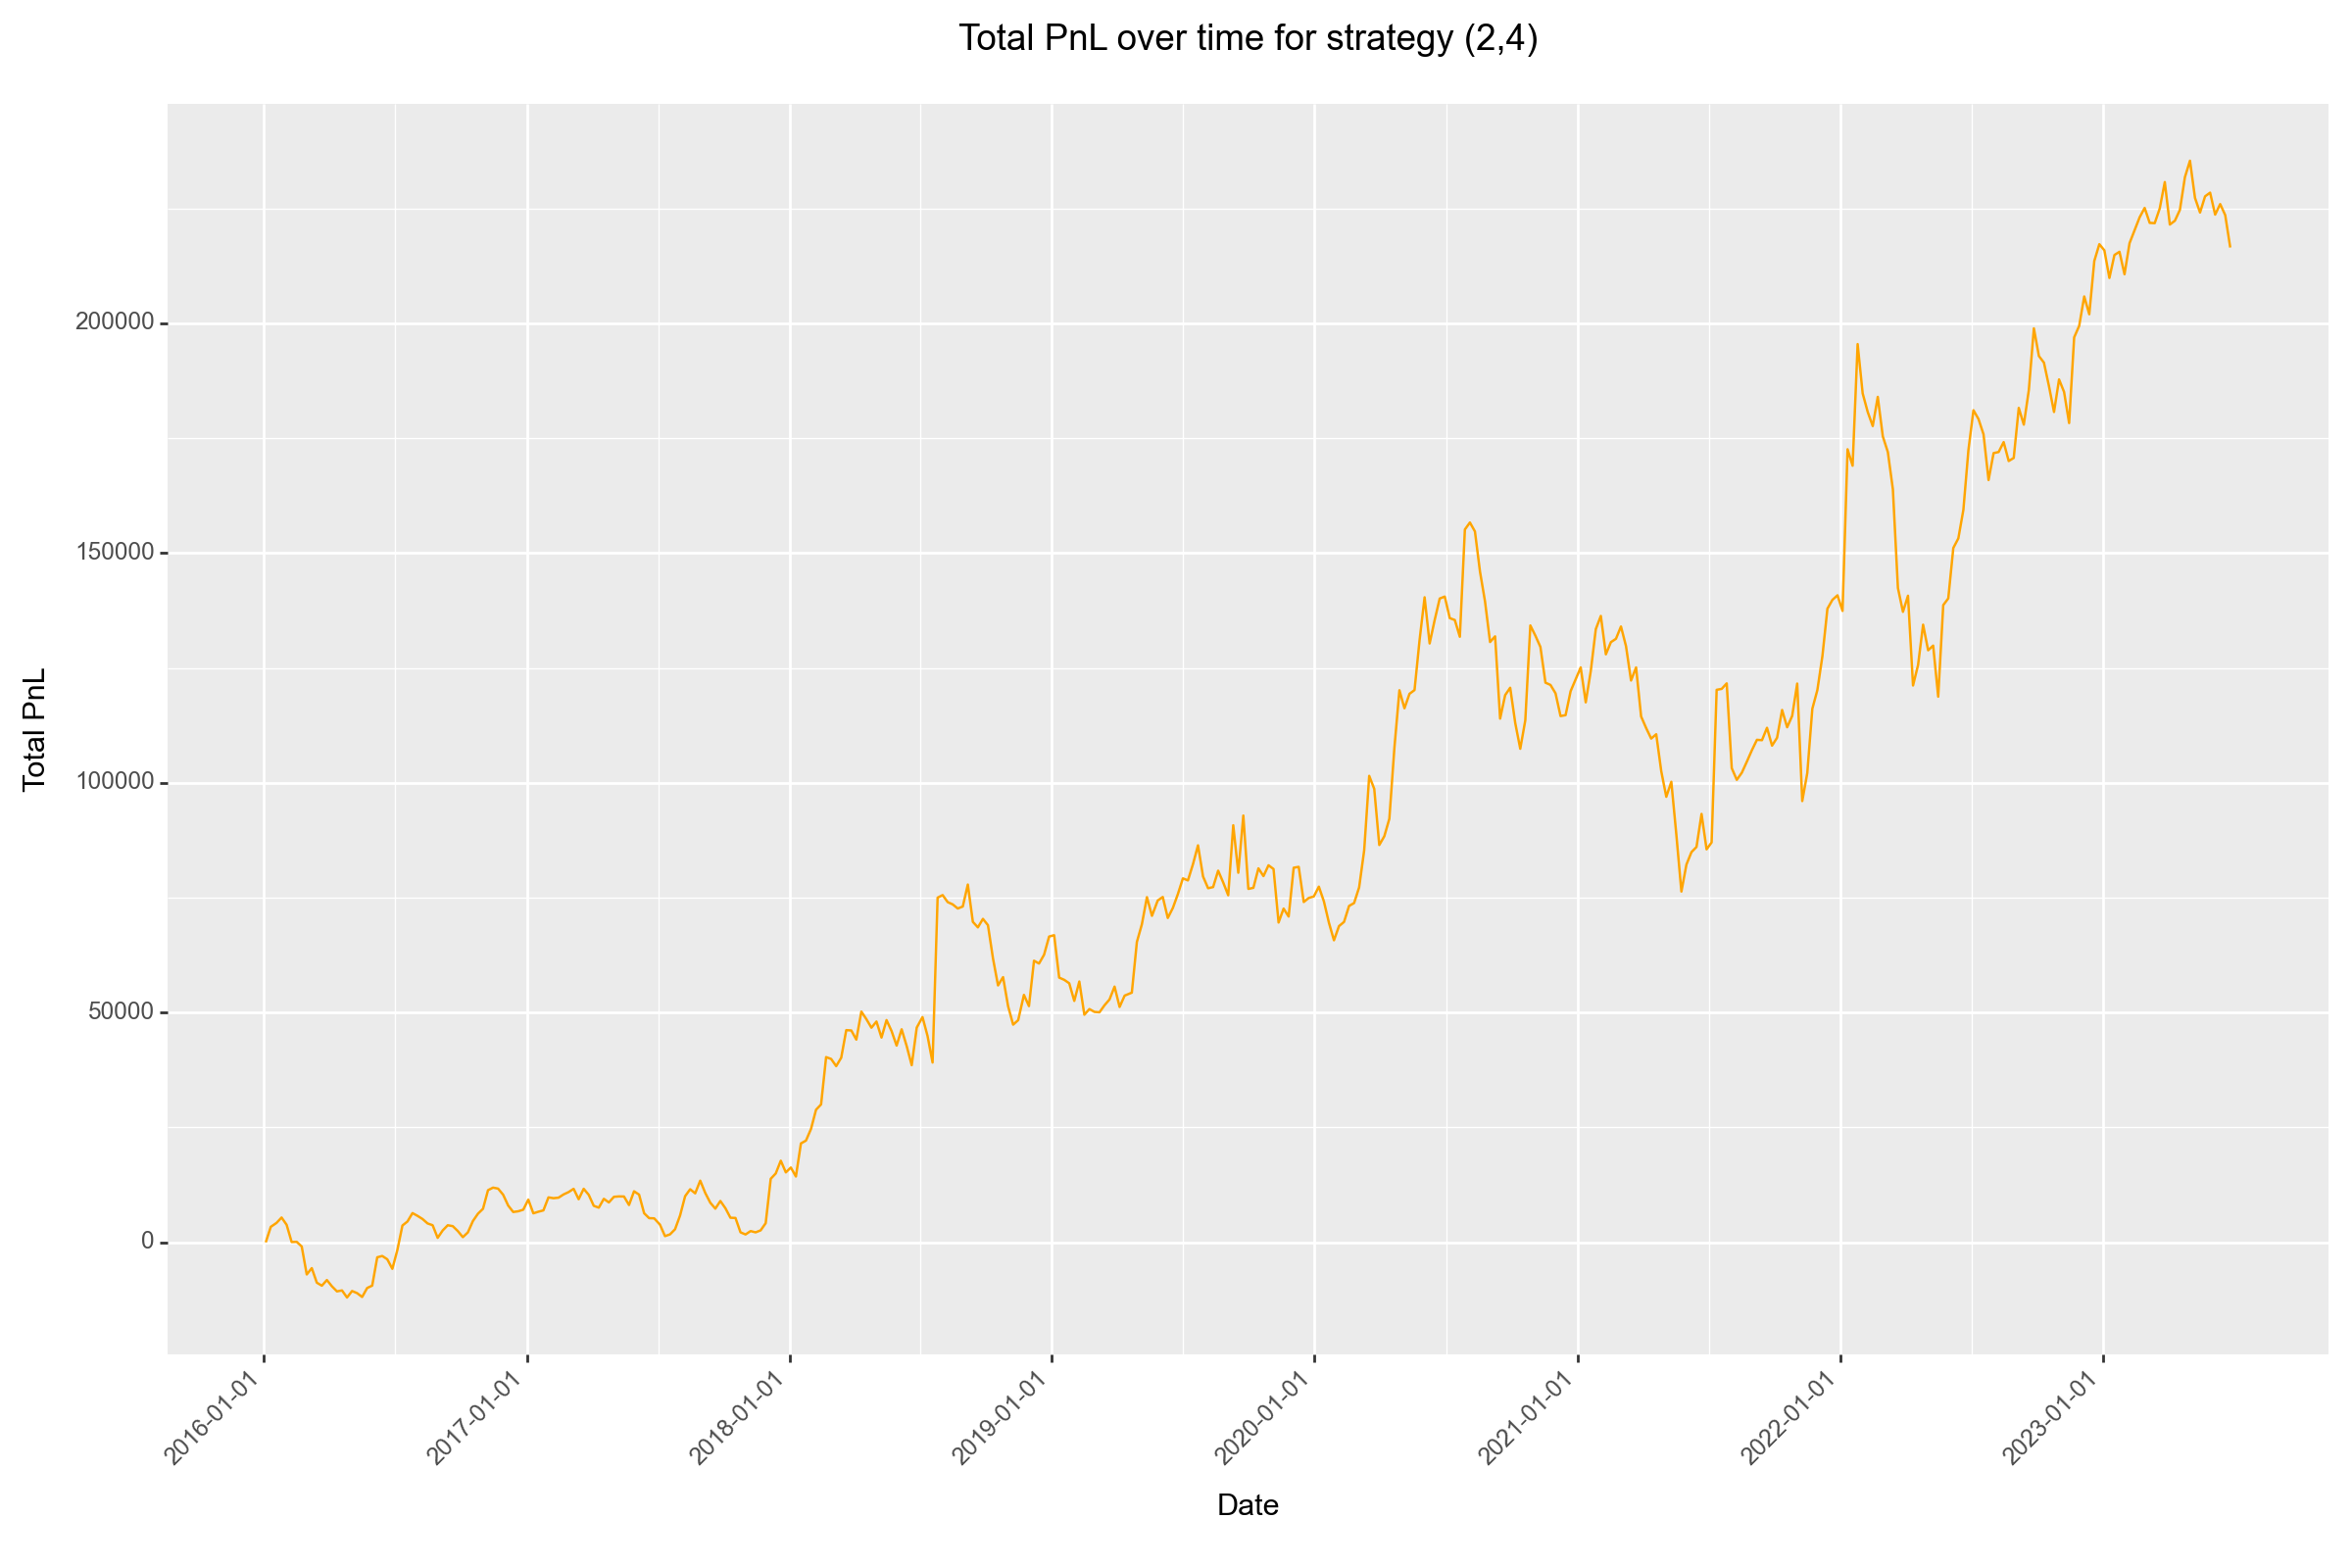

In [806]:
total_pnl_plot_for_highest_pnl = (
    p9.ggplot(highest_pnl_log, p9.aes(x='date', y='total_pnl')) 
    + p9.geom_line(color='orange')
    + p9.theme(figure_size=(12, 8), 
               plot_title=p9.element_text(hjust=0.5),
               axis_text_x=p9.element_text(angle=45, hjust=1))
    + p9.labs(title='Total PnL over time for strategy (2,4)',
           x='Date',
           y='Total PnL')
)

total_pnl_plot_for_highest_pnl.draw()

In [815]:
# We multiply by sqrt(52) to annalualize the ratio (52/sqrt(52))
highest_pnl_sharpe = np.sqrt(52)* (highest_pnl_log['weekly_pnl'].mean() / highest_pnl_log['weekly_pnl'].std())
highest_pnl_sharpe

0.6020530963660637

#### Surprisingly, we actually see a fairly reasonable Sharpe ratio. It is not the best possible ratio that we could have observed, but it is a realistic value which indicates that the quantile strategy with weight scheme 2 and metric 'combination_value' is viable for actual use. This also has the secondary effect of confirming the validity of our non-trivial combination of the fundamentals, as we see that it appears in the best strategy and produces a weekly pnl Sharpe ratio that isn't too outlandish. Additionally, we saw previously that the risk metrics were not a cause for concern, which further indicates that this combination of the fundamentals better diversifies the strategy to perform well. However, let us dive deeper into the other strategies to see if the PnL is more of a result of the metric or the weighting scheme.

In [824]:
weight_scheme_strats = strats_list[4:8]
combination_metric_strats = strats_list[3::4]



(2, 4)

In [825]:
combination_metric_strats

[[<__main__.QuantileTradingStrategy at 0x21981ad5590>, (1, 4)],
 [<__main__.QuantileTradingStrategy at 0x21981bd0c50>, (2, 4)],
 [<__main__.QuantileTradingStrategy at 0x2198194fa50>, (3, 4)],
 [<__main__.QuantileTradingStrategy at 0x2198061fed0>, (4, 4)]]

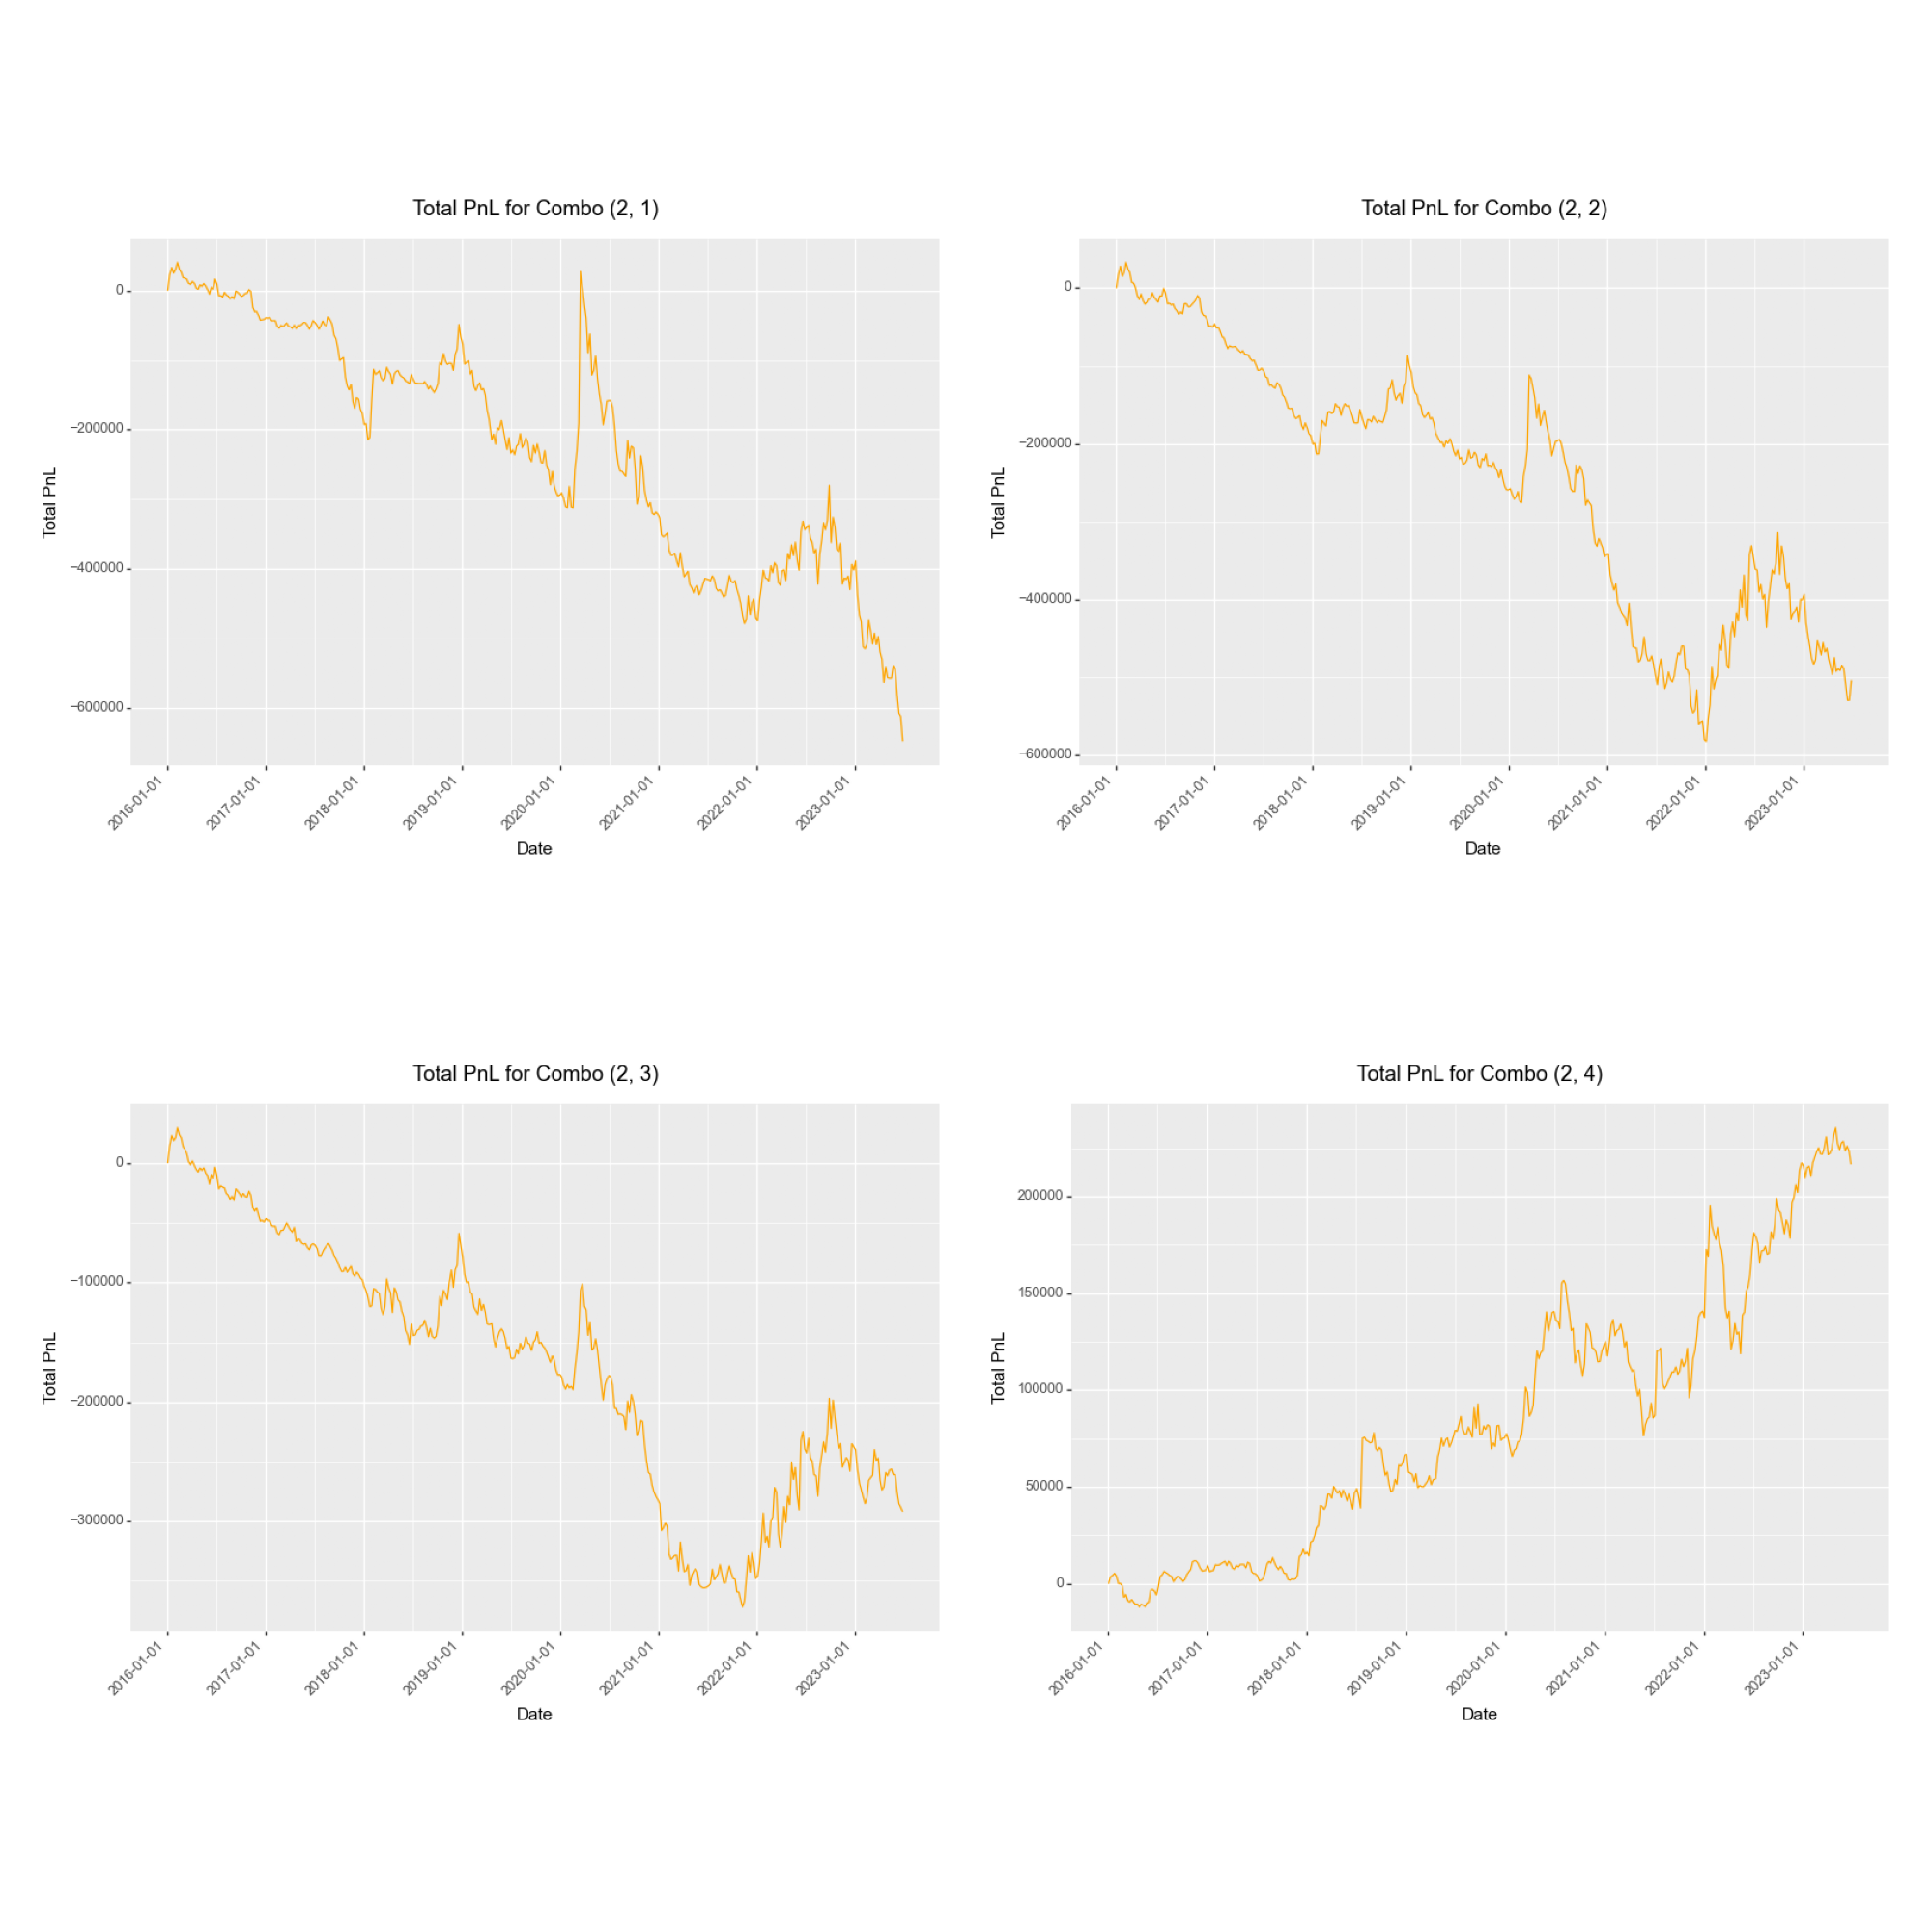

In [835]:
def get_plot_as_image(data, plot_combo):
    plot = (p9.ggplot(data, aes(x='date', y='total_pnl'))
            + p9.geom_line(color='orange')
            + p9.theme(figure_size=(8, 6), 
               plot_title=p9.element_text(hjust=0.5),
               axis_text_x=p9.element_text(angle=45, hjust=1))
            + p9.labs(title=f'Total PnL for Combo {plot_combo}', x='Date', y='Total PnL'))
    buffer = io.BytesIO()
    plot.save(buffer, format='png', verbose=False)
    buffer.seek(0)
    return imread(buffer)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, lst in enumerate(weight_scheme_strats):
    df = lst[0].trading_log
    combo = lst[1]
    
    image = get_plot_as_image(df, combo)
    axes[i].imshow(image)
    axes[i].axis('off')


plt.tight_layout()
plt.show()

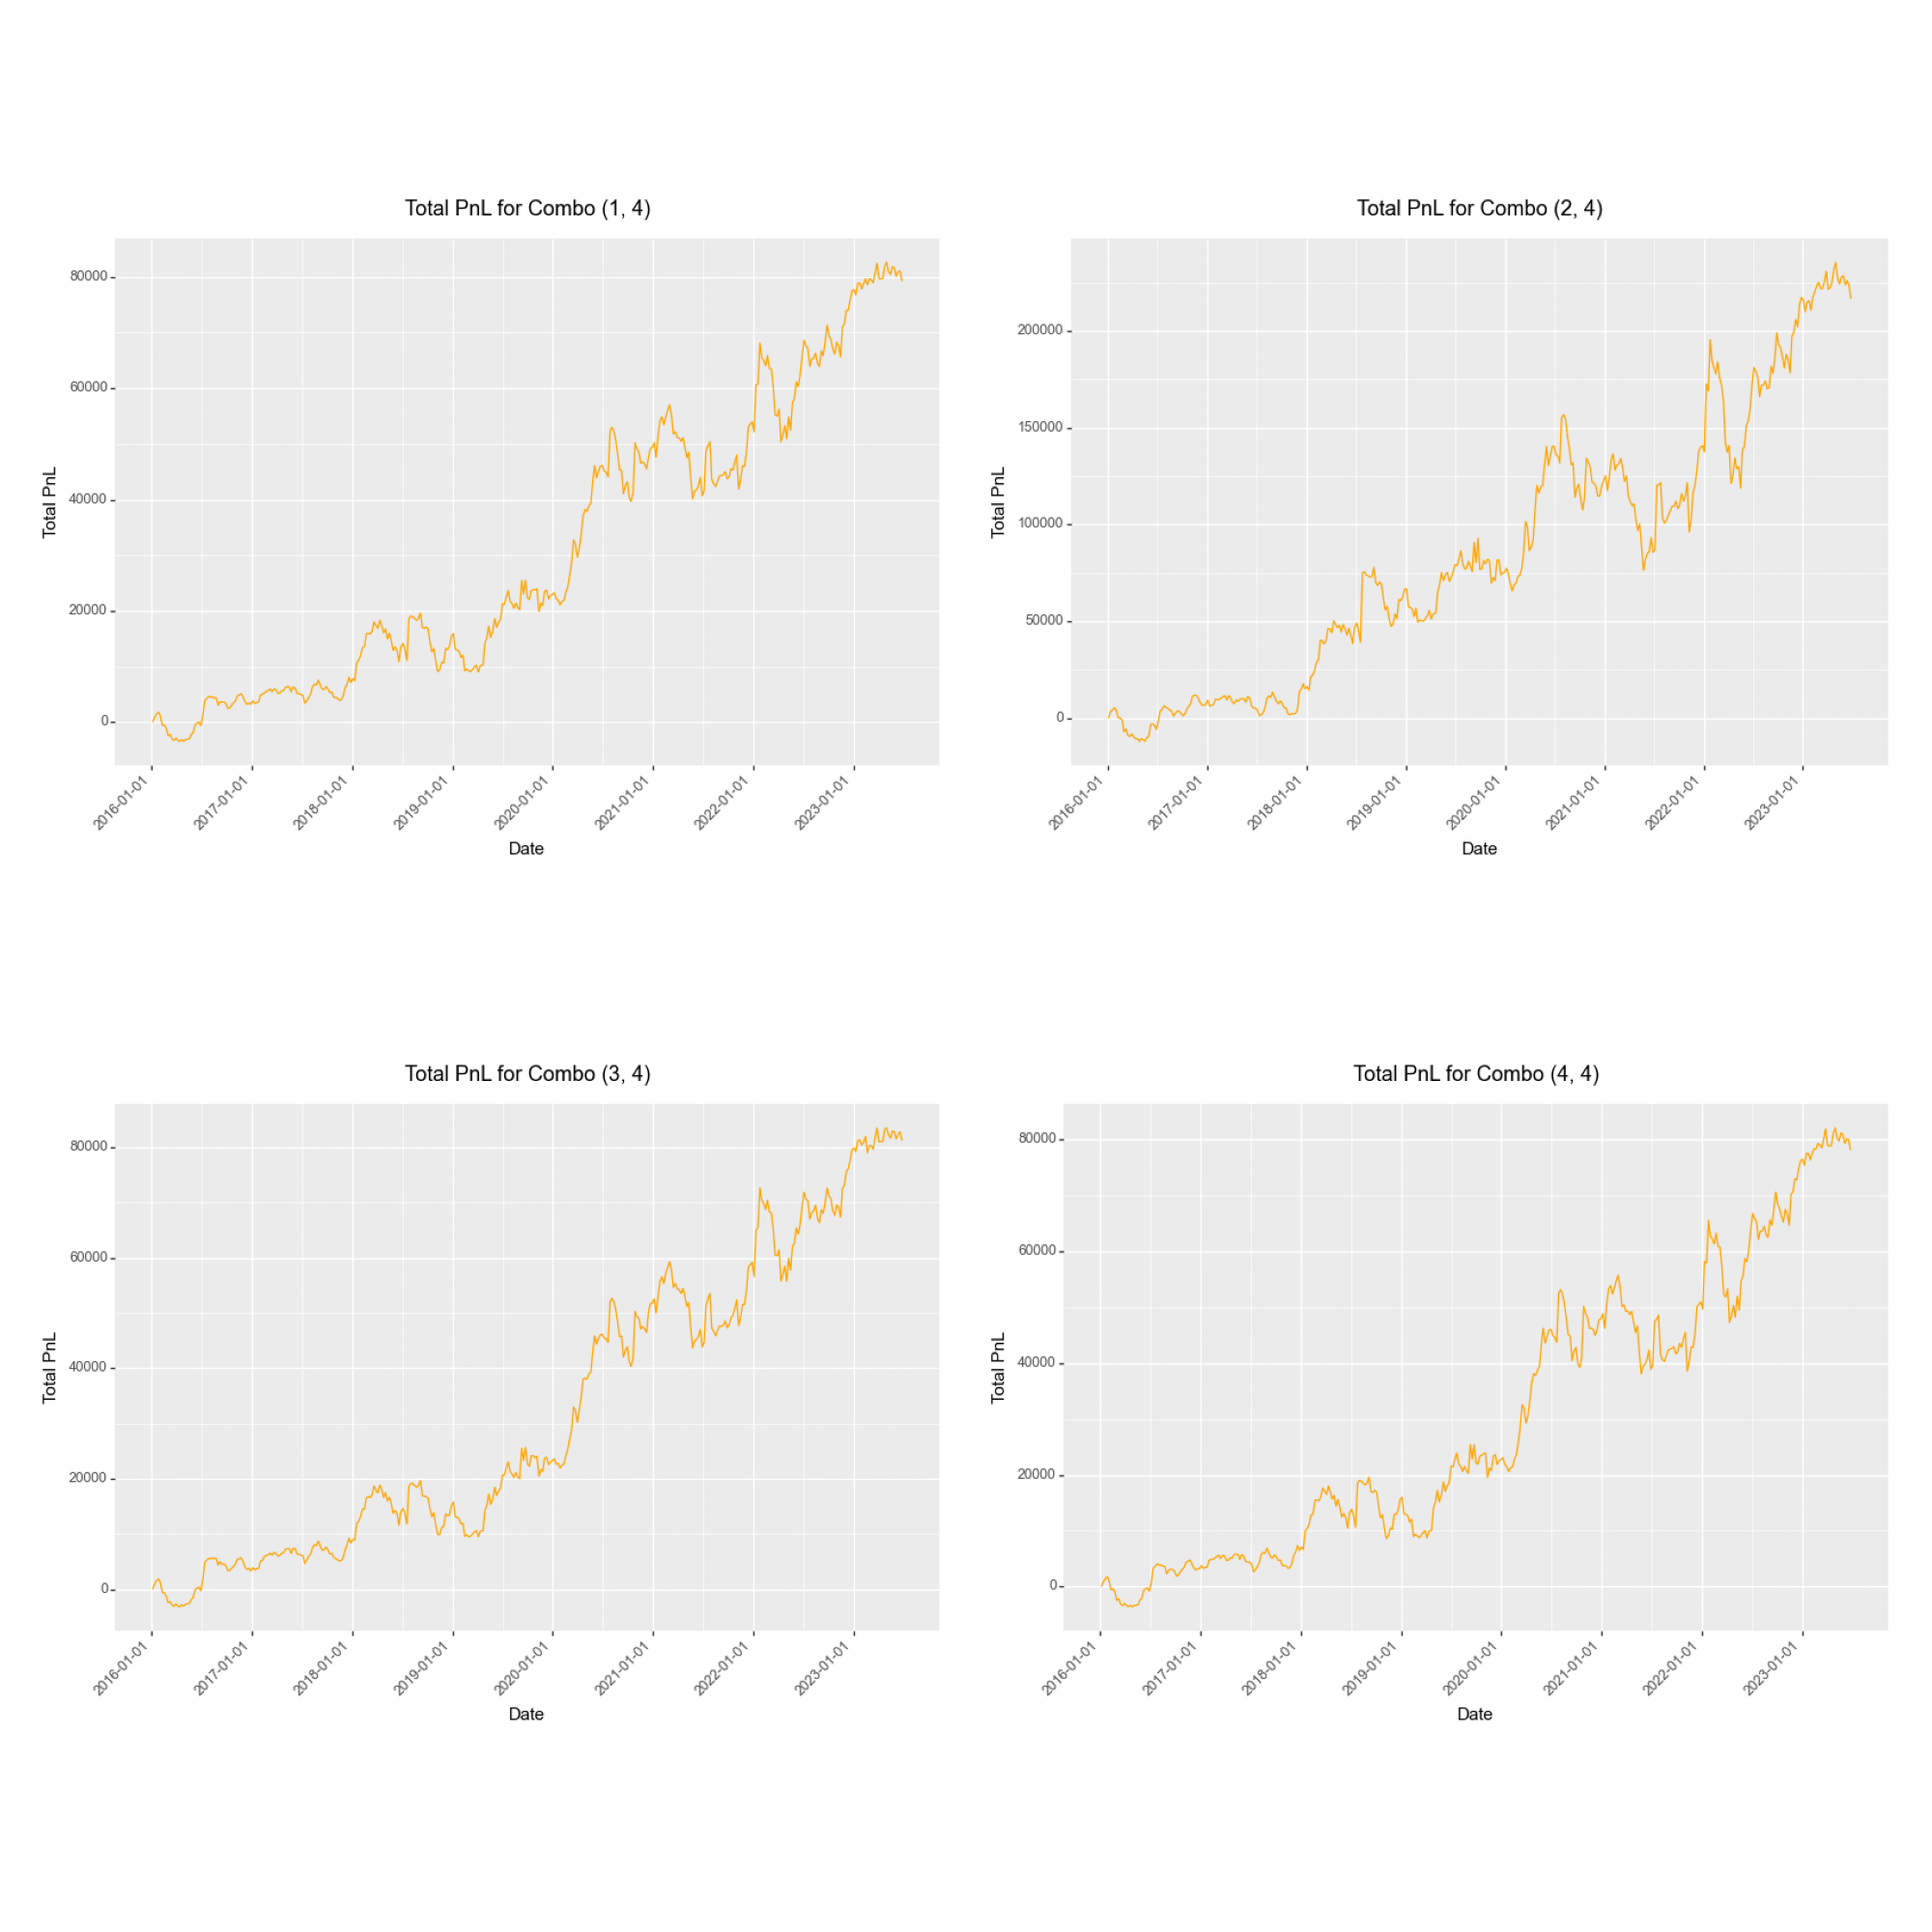

In [836]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, lst in enumerate(combination_metric_strats):
    df = lst[0].trading_log
    combo = lst[1]
    
    image = get_plot_as_image(df, combo)
    axes[i].imshow(image)
    axes[i].axis('off')


plt.tight_layout()
plt.show()

#### From the above plots, we do indeed see that our combination metric was responsible for the upward trend in total PnL and not the weighting scheme. In fact, the chosen weighting scheme is quite horrible when considering any of the other fundamentals. However, we should of course be skeptical when seeing pretty looking PnL graphs and consider some of the underlying reasons why this may occur. This is especially true since we wouldn't be able to tell the graphs apart if not for the scaling values for Total PnL.

#### The first consideration is to look at all the other graphs we have not observed and see if there is anything else out of the ordinary.

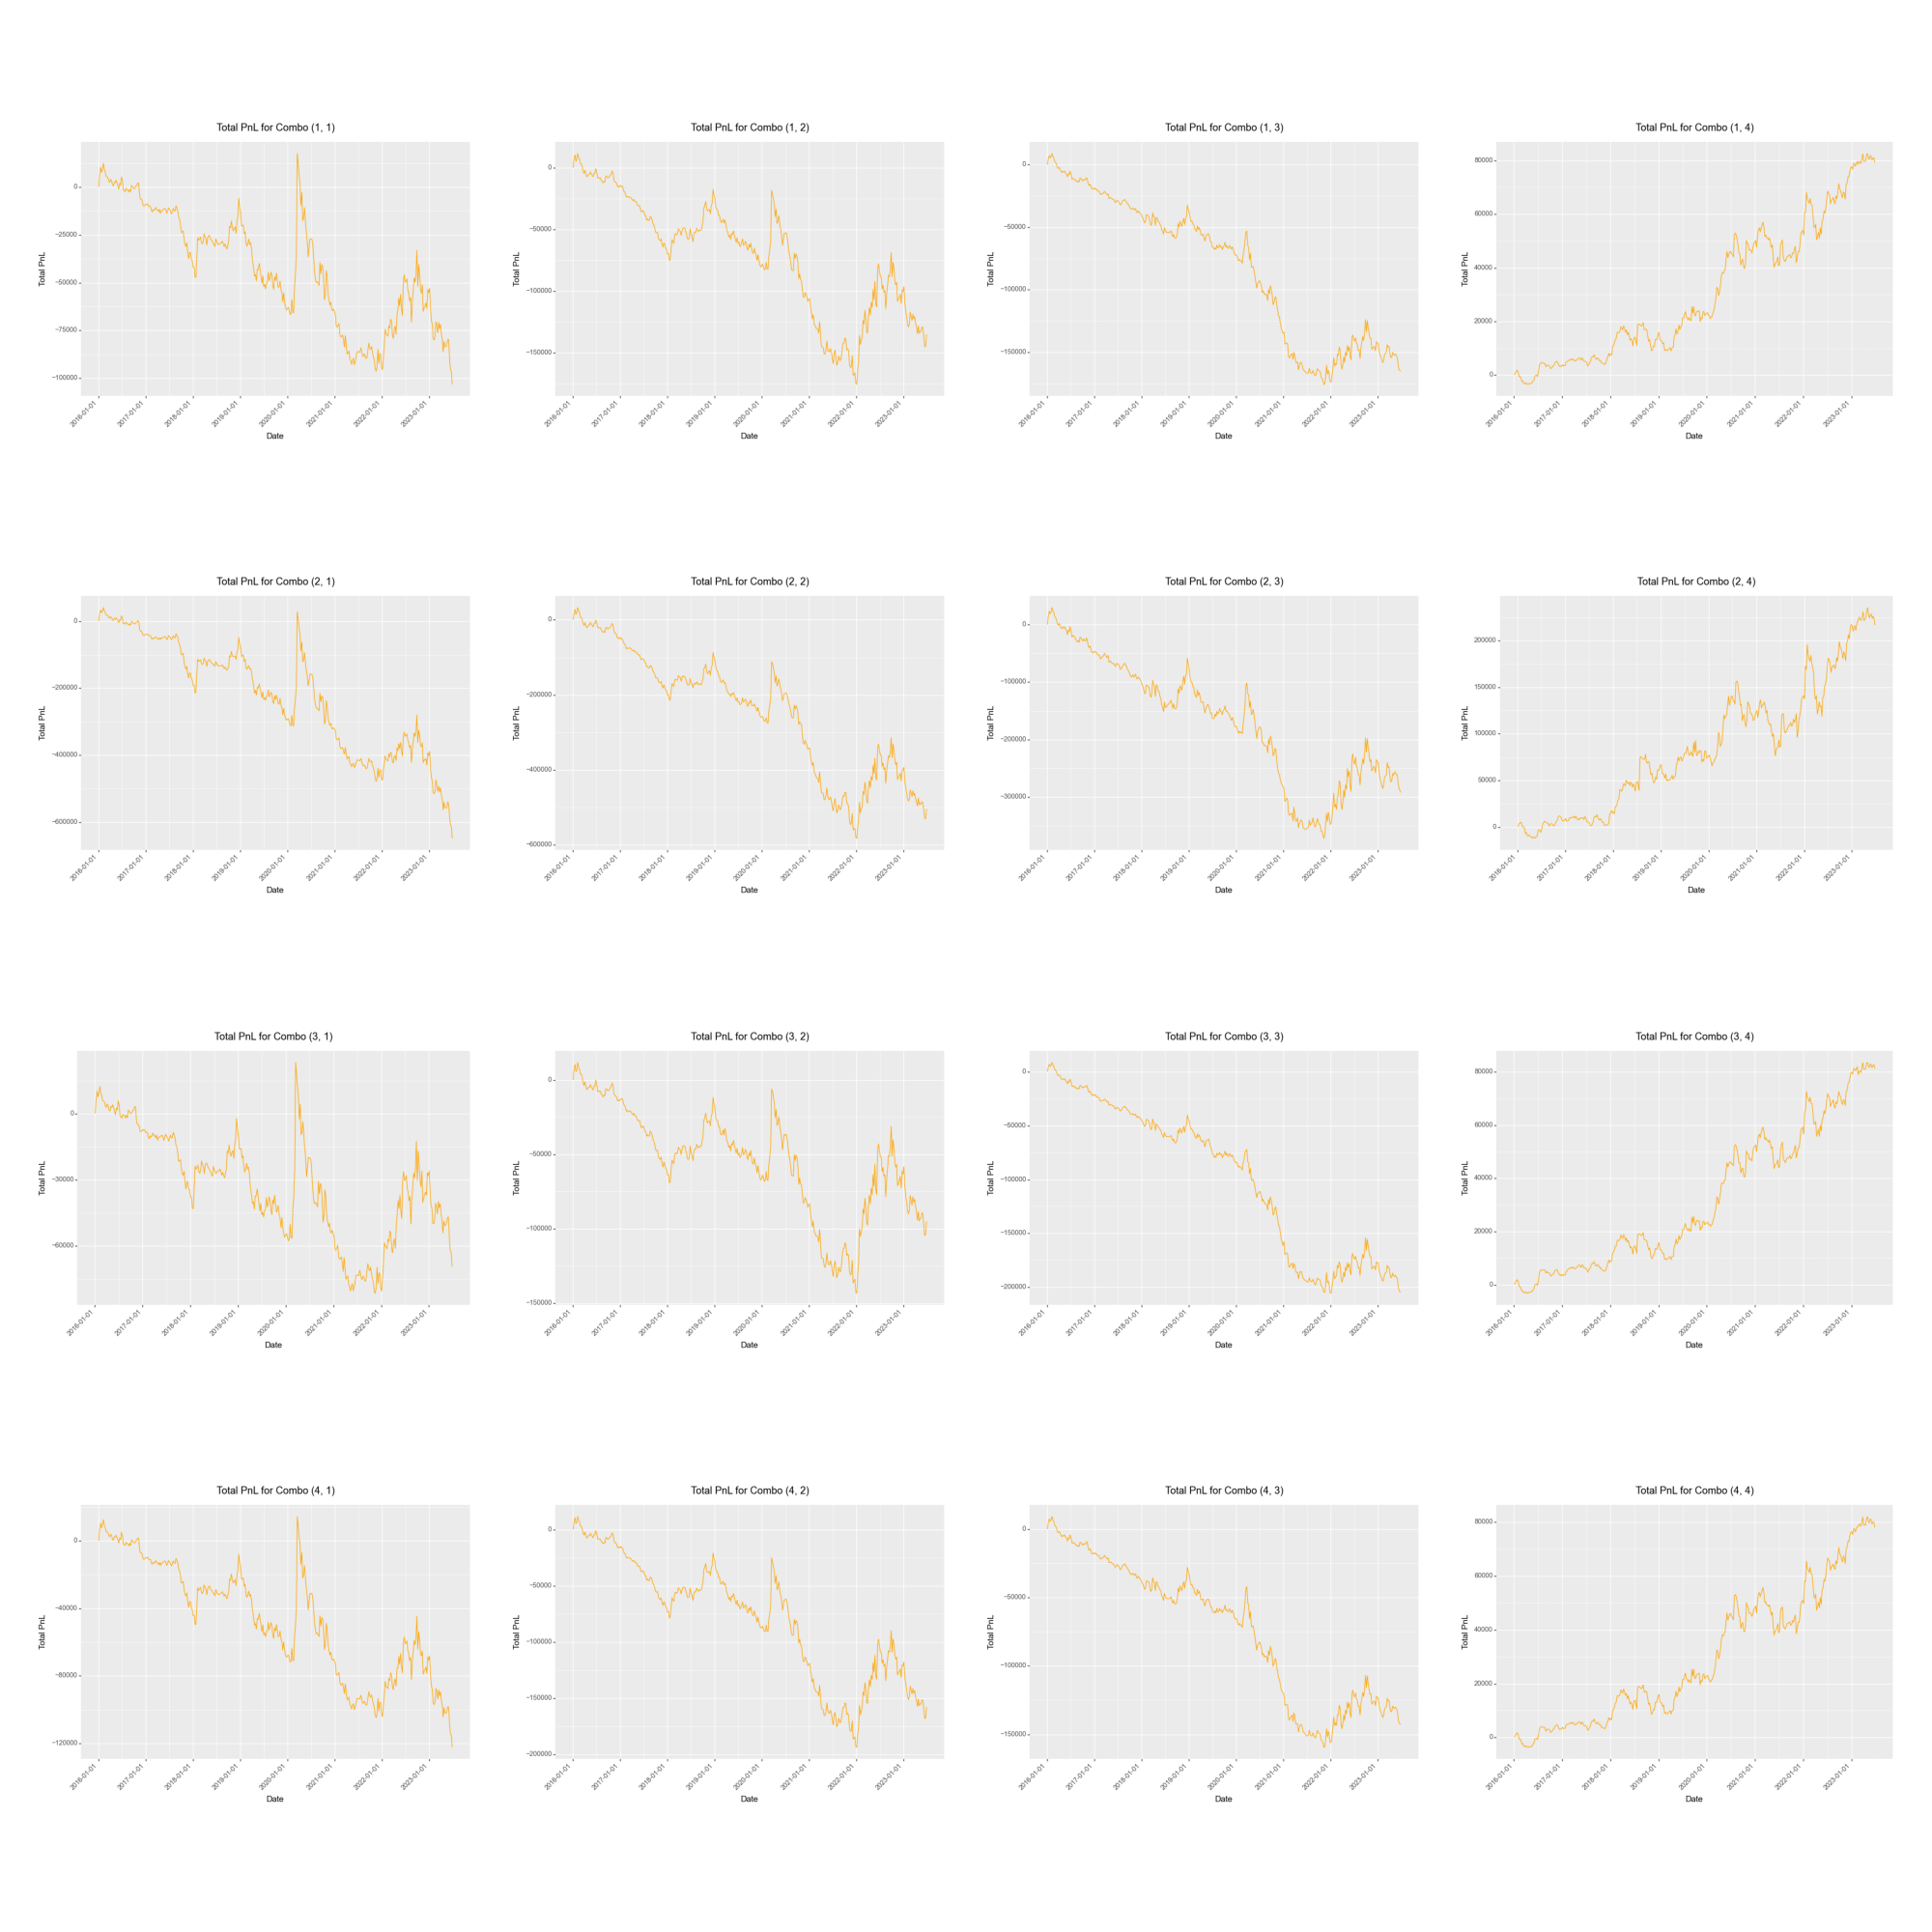

In [839]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i, lst in enumerate(strats_list):
    df = lst[0].trading_log
    combo = lst[1]
    
    image = get_plot_as_image(df, combo)
    axes[i].imshow(image)
    axes[i].axis('off')


plt.tight_layout()
plt.show()

#### From these graphs, we see that each column (metric) does follow a similar graph pattern, which at least eases some of the concerns we had about the combination_value metric. This is actually not very surprising given that the stocks picked for a single metric is synonymous across all weight schemes since the weight only impact how much of a specific ticker we invest in.

#### Looking at each row, we see that only the combination metric finishes with a positive PnL, which is interesting given that it is a combination of the percent change of the percent changes of the other metrics. This indicates that while a singular metric ranking is inefficient, considering companies that are trending in a positive direction collectively across these fundamentals is beneficial for our quantile strategy.

#### Now that we have deduced that our combination value graphs following similar trends is not a cause for concern, we should stress test this specific metric and see if it works across an assortment of quantile values. We have only observed the top and bottom 10% of values, but it would be interesting to see if trading on a wider band causes issues with the combination metric. We will therefore look at a new strategy with quantile 0.2, metric 4, and weight 1 (as we have seen that the weighting scheme is not very relevant for a set metric).

In [846]:
larger_quantile_combination_strat = QuantileTradingStrategy(
                data=final_strategy_df,
                funding_rate=0.012,
                weight_type=1,
                metric_type=4,
                quantile=0.2
            )
larger_quantile_combination_strat.run_strategy()

larger_qunatile_log = larger_quantile_combination_strat.trading_log
larger_qunatile_log

,date,new_short_trades,new_long_trades,capital_on_hand,weekly_pnl,total_pnl
0,2016-01-04,98169.219259,106634.262625,2.048035e+06,0.000000,0.000000
1,2016-01-11,67233.241932,52679.364914,2.079660e+06,2250.427964,2250.427964
2,2016-01-19,77306.360774,49667.581115,2.084538e+06,3074.592426,5325.020390
3,2016-01-26,49692.566509,108498.198472,1.994116e+06,-93.627364,5231.393026
4,2016-02-02,66771.706227,71159.609096,2.047799e+06,2156.971412,7388.364438
...,...,...,...,...,...,...
385,2023-05-30,171729.964127,120576.037609,2.406709e+06,6.842699,166478.385909
386,2023-06-06,110910.691194,298874.281457,2.066121e+06,-5354.206939,161124.178970
387,2023-06-13,151502.348067,155695.259268,2.191522e+06,-524.850839,160599.328131
388,2023-06-20,202173.055808,143083.189220,2.324650e+06,399.470374,160998.798505


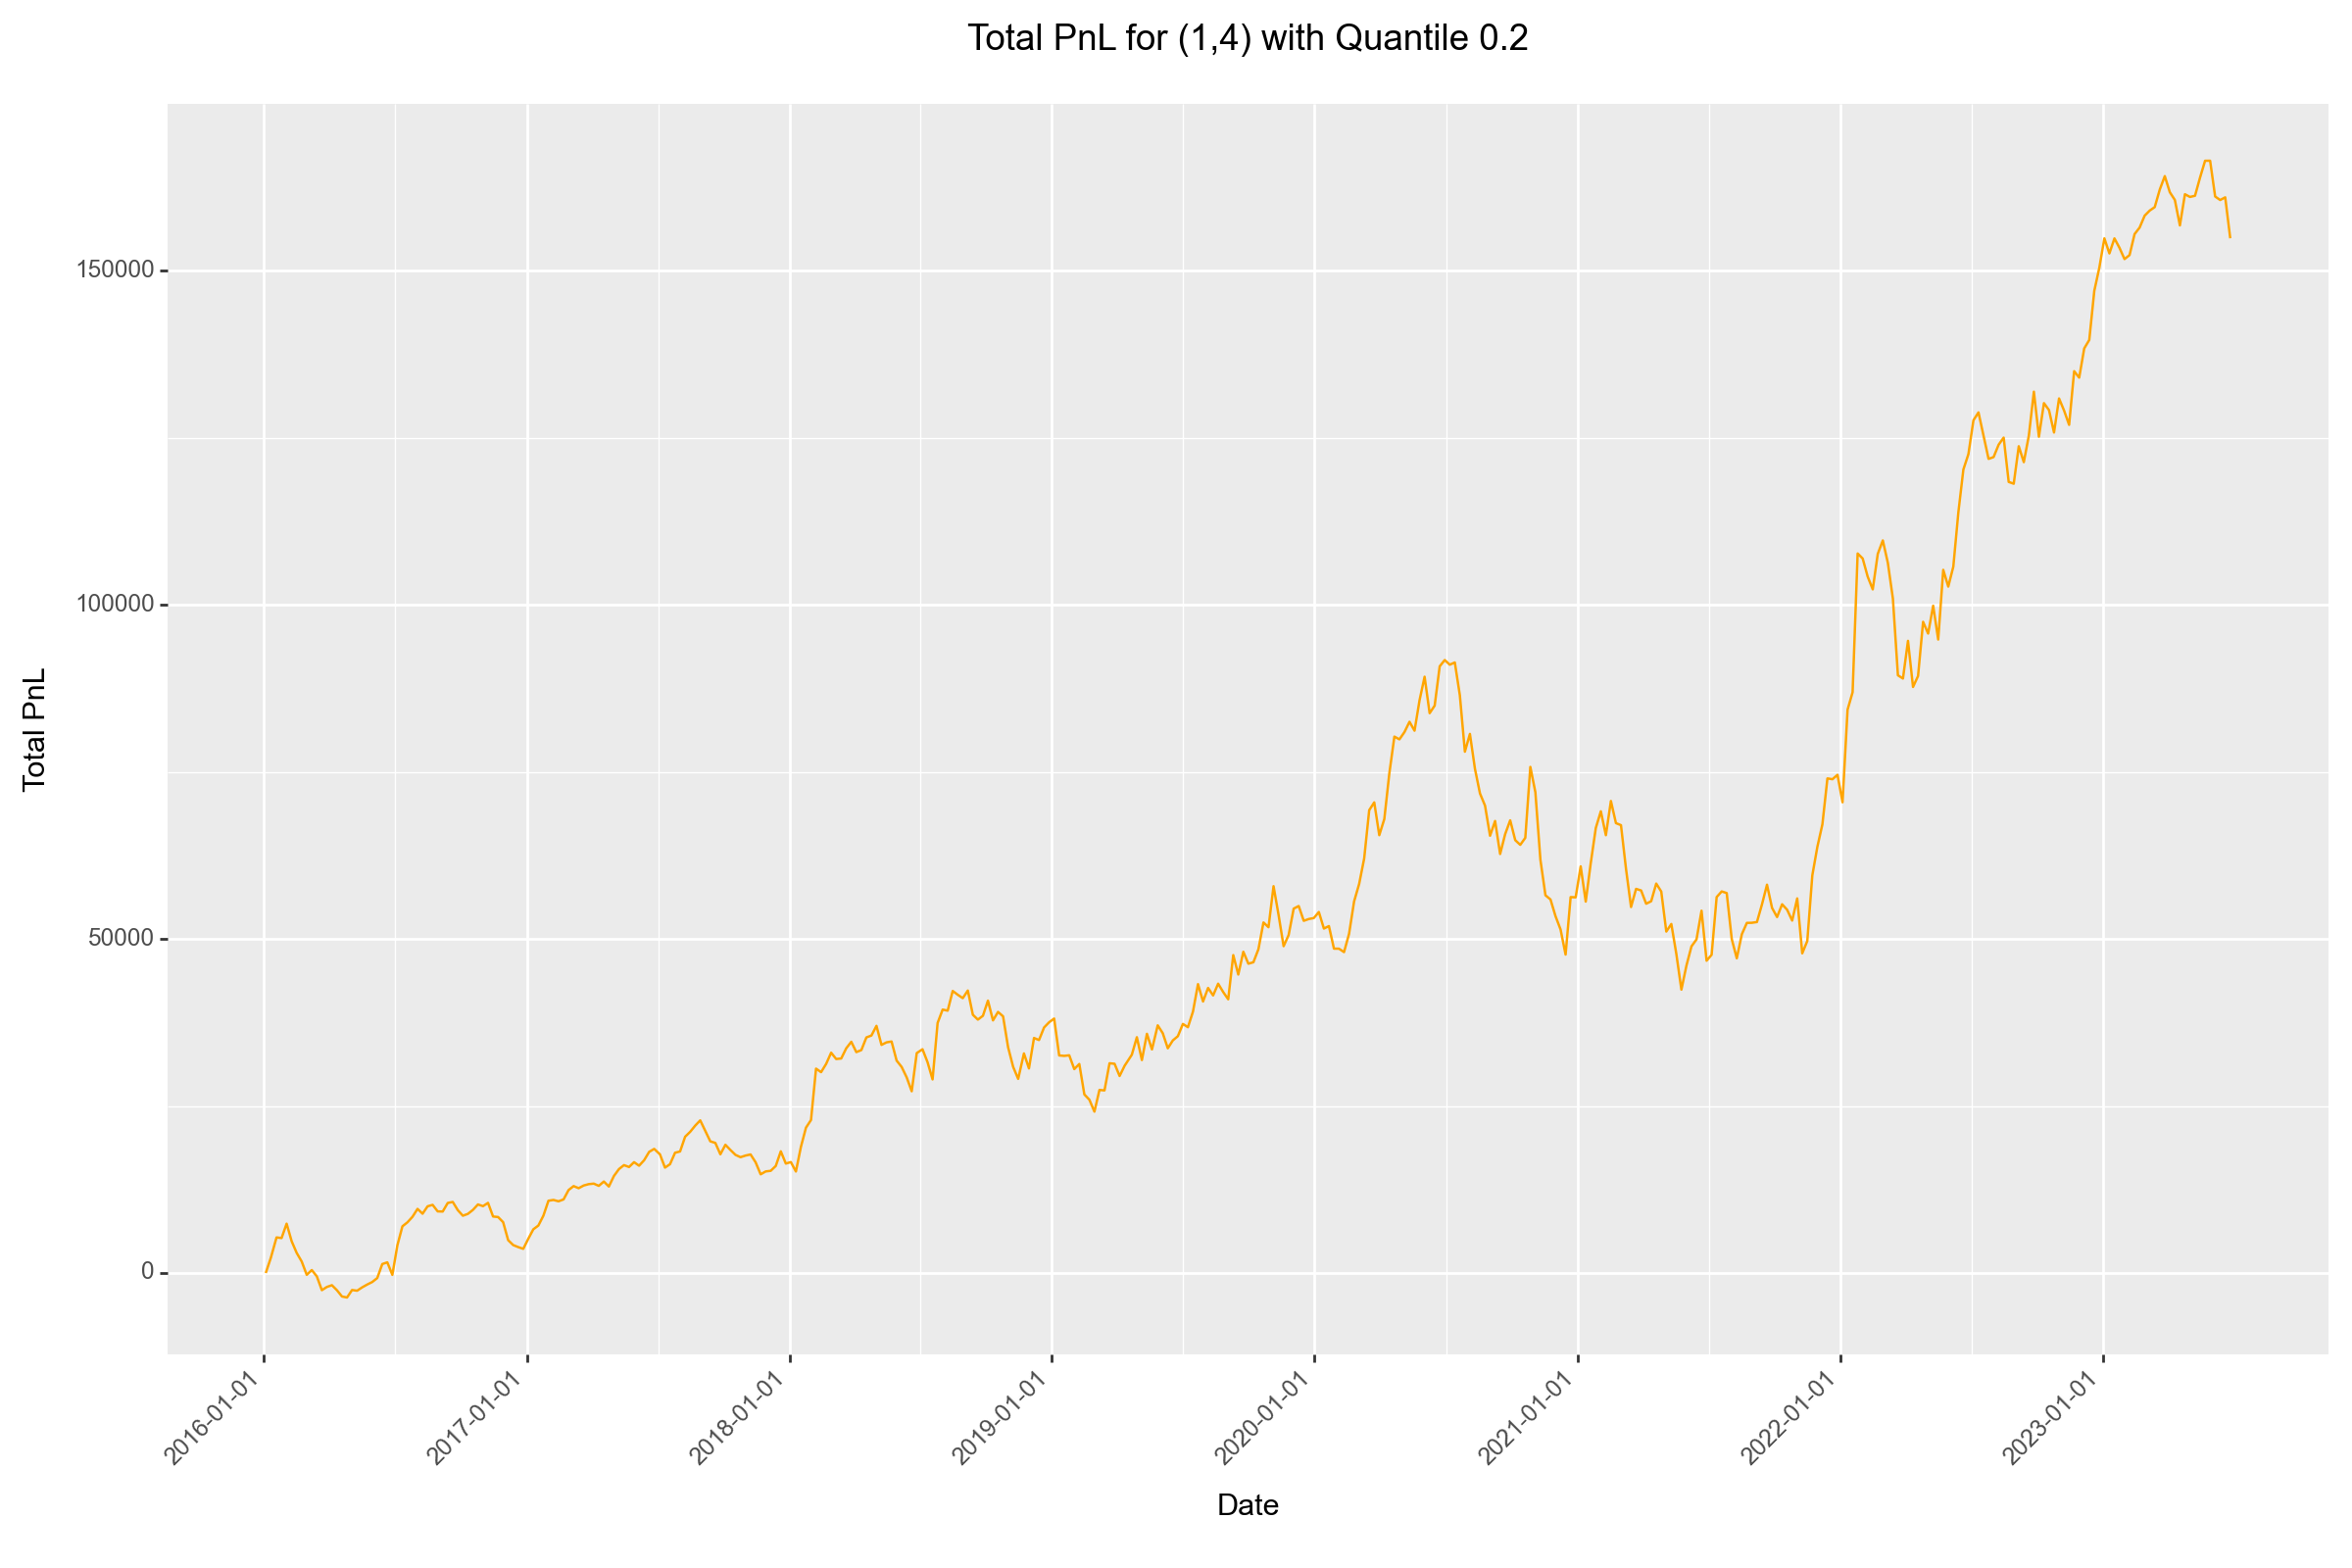

In [847]:
large_quantile_combo_plot = (
    p9.ggplot(larger_qunatile_log, p9.aes(x='date', y='total_pnl')) 
    + p9.geom_line(color='orange')
    + p9.theme(figure_size=(12, 8), 
               plot_title=p9.element_text(hjust=0.5),
               axis_text_x=p9.element_text(angle=45, hjust=1))
    + p9.labs(title='Total PnL for (1,4) with Quantile 0.2',
           x='Date',
           y='Total PnL')
)

large_quantile_combo_plot.draw()

#### Even with a larger quantile, we see that there is a significant PnL opportunity, which warrants further investigation into this specific metric. What's most interesting about this PnL chart is that while there is a big jump in the COVID period, the largest increase in percentage PnL happens about 2 years following the pandemic. I would need to research the specific market conditions around this time to see if this PnL can be attributed to other market factors. Also, to adequately confirm the validity of using this combination value for future strategies, I would need to consult a professional in the financial industry and talk with academic researchers about some of the underlying economic conditions that could be attributed to this strategy success. Overall, it was interesting to see that my first instinct on adding a ratio lead to the most successful of my strategies.

## Conclusion

#### Firstly, I learned that collecting, cleaning, and consolidating data can be a time-consuming and unforgiving task. Even with a large amount of available data, much of what is readily available to the public is raw and requires significant effort to form into a meaningful data set. While it ended up taking about half of my total time throughout this strategy, I am now more well-equipped to synthesizing financial data sources into one coherent data frame for strategy use.

#### Secondly, the formulation and testing of my implementation of the quantile trading strategy lead to a promising extension. If I were to continue to explore the combination value that I used as my fourth metric, I am certain that I would be able to address some of the pressing questions concerning the success of its use. However, without going explicitly into the fine details of its economic underpinnings, I do have a few ideas on why it seems to successful. For one, we have an extreme lookahead bias given that we have used a quarterly report to fill in the specific combination values on a weekly basis. This poses the problem that our combination value percent change was smooth due to all the relevant quarterly data already being filed. Even if we have the previous filing data, we cannot predict what the next filing report will show and thus are left to fill in for the intermediary fundamental values based on our best estimate. If this diverges vastly from what is actually filed with the companies we trade, then we will be in danger of a severe reduction to our PnL opportunity. Also, we have to keep in mind that implementing this quantile strategy means consistently collecting and filtering the Zacks data that comes in, and there is a disconnect between when company filing reports are actually released. Since we are trading on a weekly basis, we could miss a major trading opportunity by waiting the additional week, or we could be left with a ticker that drastically reduces PnL due to poor earnings, etc. In all, this metric definitely shows promise and if it can align with a real-world implementation would be a great starting point for other branching metrics. There are surely more combinations of the three fundamental values that we used that can create PnL opportunity if this specific metric is proven to be effective.